# **QBUS6810 Group Assignment - Airbnb House Rentals Prediction & Data mining**
## Group 77
## Group members: 500131837; 500132362; 500155383; 500387962; 490247372

# 1. Packages

In [1]:
# Basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from mlxtend.regressor import StackingCVRegressor
from mlxtend.regressor import StackingRegressor

# Metrics
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

%matplotlib inline
colours = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
plt.rcParams['figure.figsize'] = (9, 6)
sns.set_palette(colours)
sns.set(font_scale=1.2)

# 2. Exploratory data Analysis and Feature Engineering

In [2]:
df = pd.read_csv('Data/train.csv')
df.head(1)

,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
0,Sunny huge private room in Paddington,NaN,NaN,Maritzza,2015-08-06,"Sydney, New South Wales, Australia",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,t,2,0,2,0,NaN,$85.00


In [3]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'las

In [4]:
host = ['name', 'description', 'neighborhood_overview',
        'host_name', 'host_since', 'host_location',
        'host_about', 'host_response_time', 'host_response_rate',
        'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
        'host_listings_count', 'host_total_listings_count', 'host_verifications',
        'host_identity_verified']

location = ['neighbourhood_cleansed', 'latitude', 'longitude']

room = ['property_type', 'room_type',
        'accommodates', 'bathrooms_text',
        'bedrooms', 'beds', 'amenities']

night = ['minimum_nights', 'maximum_nights',
        'minimum_minimum_nights', 'maximum_minimum_nights',
        'minimum_maximum_nights', 'maximum_maximum_nights',
        'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']

avail = ['instant_bookable', 'has_availability',
         'availability_30', 'availability_60',
         'availability_90', 'availability_365']

review = ['number_of_reviews', 'number_of_reviews_ltm',
          'number_of_reviews_l30d', 'first_review',
          'last_review', 'review_scores_rating',
          'review_scores_accuracy', 'review_scores_cleanliness',
          'review_scores_checkin', 'review_scores_communication',
          'review_scores_location', 'review_scores_value',
          'reviews_per_month']

response = ['price']

all_cols = ['host', 'location', 'room', 'night', 'avail', 'review', 'response']

## 2.1 Filter the possible useful predictors

In [5]:
for col in all_cols:
    print('=====' + col.upper() + '=====')
    print(df[eval(col)].nunique().sort_values())
    print(df[eval(col)].info())
    print('\n')

=====HOST=====
host_is_superhost                2
host_identity_verified           2
host_response_time               4
host_response_rate              53
host_listings_count             63
host_total_listings_count       63
host_acceptance_rate            93
host_neighbourhood             216
host_verifications             358
host_location                 1208
host_since                    3338
host_name                     5511
host_about                    7844
neighborhood_overview        11645
description                  19397
name                         20057
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20408 entries, 0 to 20407
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       20408 non-null  object 
 1   description                19751 non-null  object 
 2   neighborhood_overview      12536 non-null  object 
 3   host_name         

In [6]:
candidates = ['host_is_superhost', 'host_identity_verified', 'host_response_time',
              'neighbourhood_cleansed', 'latitude', 'longitude',
              'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
              'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'instant_bookable',
              'number_of_reviews',
              'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
              'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

response = ['price']

In [7]:
df = df[candidates + response]

# ------------------------------------

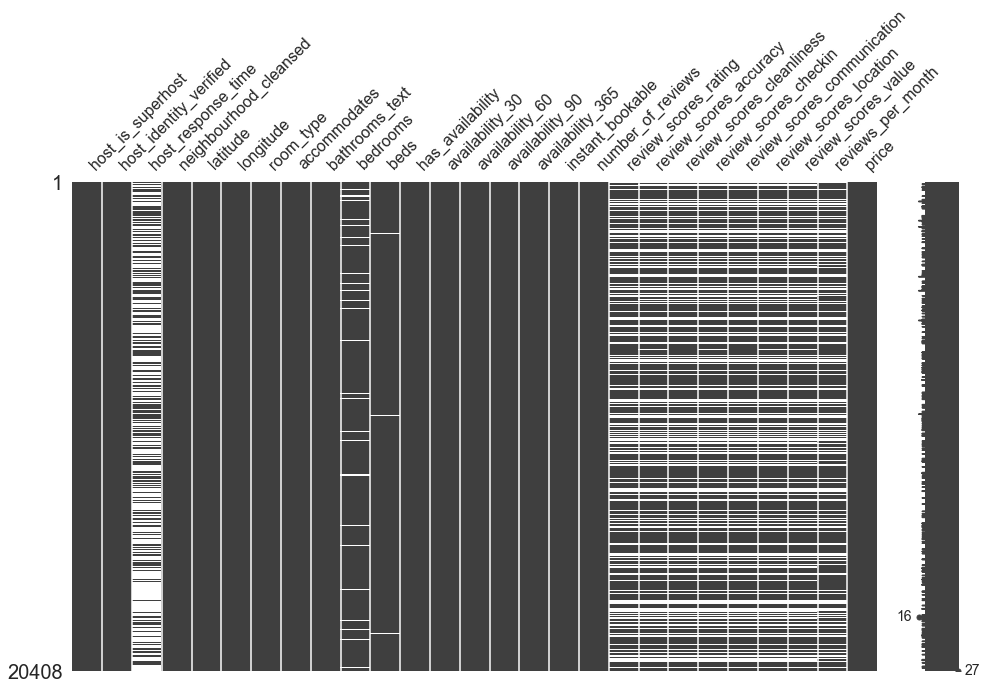

In [8]:
msno.matrix(df, figsize=(16, 9))
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20408 entries, 0 to 20407
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            20408 non-null  object 
 1   host_identity_verified       20408 non-null  object 
 2   host_response_time           8385 non-null   object 
 3   neighbourhood_cleansed       20408 non-null  object 
 4   latitude                     20408 non-null  float64
 5   longitude                    20408 non-null  float64
 6   room_type                    20408 non-null  object 
 7   accommodates                 20408 non-null  int64  
 8   bathrooms_text               20393 non-null  object 
 9   bedrooms                     19036 non-null  float64
 10  beds                         20214 non-null  float64
 11  has_availability             20408 non-null  object 
 12  availability_30              20408 non-null  int64  
 13  availability_60 

## 2.2 Response variable

In [10]:
# Response variable: price column is object
response = 'price'
df[response]

0         $85.00
1        $400.00
2        $229.00
3        $220.00
4        $127.00
          ...   
20403     $76.00
20404    $139.00
20405     $99.00
20406     $76.00
20407    $170.00
Name: price, Length: 20408, dtype: object

In [11]:
# Convert price to float
def clean(x):
    return float(x[1:].replace(',', ''))

df[response] = df[response].map(clean)
df[response]

0         85.0
1        400.0
2        229.0
3        220.0
4        127.0
         ...  
20403     76.0
20404    139.0
20405     99.0
20406     76.0
20407    170.0
Name: price, Length: 20408, dtype: float64

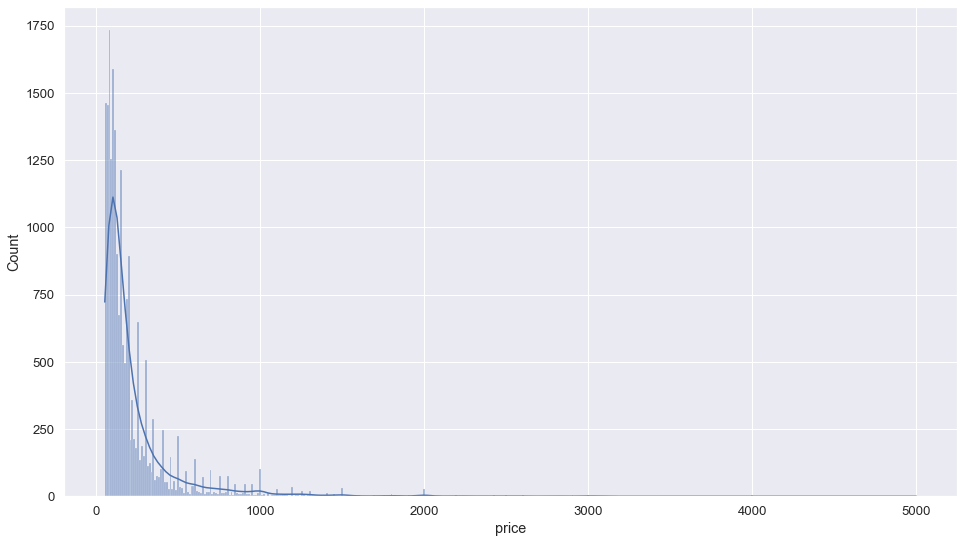

In [12]:
# Response variable ['price'] - Right-skewed
plt.figure(figsize=(16,9))
sns.histplot(df[response], kde=True)
plt.show()

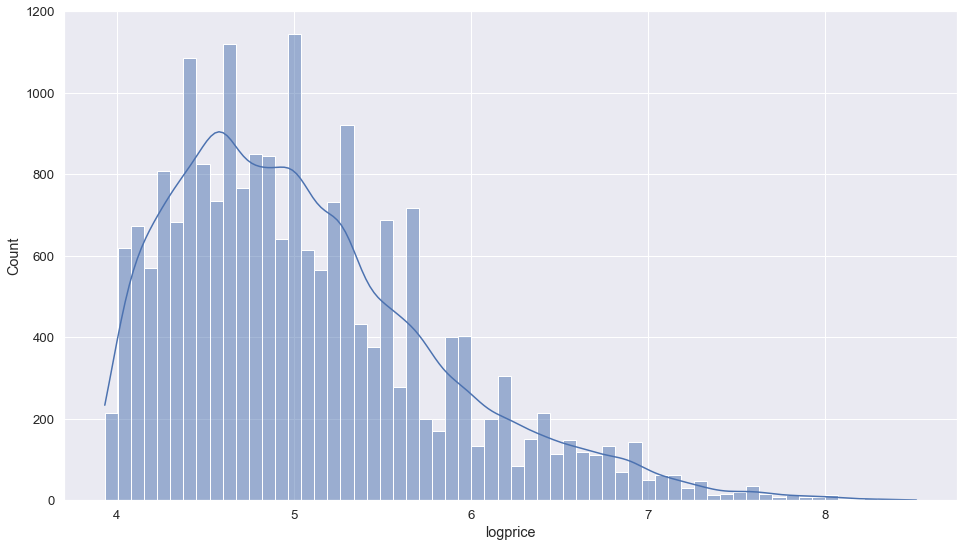

In [13]:
df['logprice'] = np.log(df['price'])
response = 'logprice'
plt.figure(figsize=(16,9))
sns.histplot(df[response], kde=True)
plt.show()

# ------------------------------------

In [14]:
df.isnull().sum().sort_values(ascending=False)

host_response_time             12023
review_scores_value             6609
review_scores_location          6605
review_scores_checkin           6604
review_scores_accuracy          6600
review_scores_communication     6594
review_scores_cleanliness       6592
review_scores_rating            6564
reviews_per_month               5884
bedrooms                        1372
beds                             194
bathrooms_text                    15
host_is_superhost                  0
instant_bookable                   0
price                              0
number_of_reviews                  0
availability_90                    0
availability_365                   0
host_identity_verified             0
availability_60                    0
availability_30                    0
has_availability                   0
accommodates                       0
room_type                          0
longitude                          0
latitude                           0
neighbourhood_cleansed             0
l

In [15]:
# Columns with too many NaN values what cannot be handled properly
df = df.drop(columns=['host_response_time', 'reviews_per_month'], axis=1)

# ------------------------------------

## 2.3 Average review scores

In [16]:
# Merge review scores into one column
df['review_avg'] = df[['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                       'review_scores_communication', 'review_scores_location', 'review_scores_value']].mean(axis=1)

df = df.drop(columns=['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                      'review_scores_communication', 'review_scores_location', 'review_scores_value'], axis=1)

# Use 0 to present no average review score
df['review_avg'] = np.floor(df['review_avg'])
df['review_avg'] = df['review_avg'].fillna(0).astype('int')
df['review_avg'].value_counts()

9     7385
0     6590
10    5107
8      909
7      220
6       85
2       40
5       35
4       21
3       16
Name: review_avg, dtype: int64

In [17]:
# We use review_avg later due to less categories
df[['review_scores_rating', 'review_avg']].nunique()

review_scores_rating    47
review_avg              10
dtype: int64

In [18]:
print(df[['review_scores_rating', 'review_avg']].corr())
df = df.drop(columns='review_scores_rating', axis=1)

                      review_scores_rating  review_avg
review_scores_rating              1.000000    0.720104
review_avg                        0.720104    1.000000


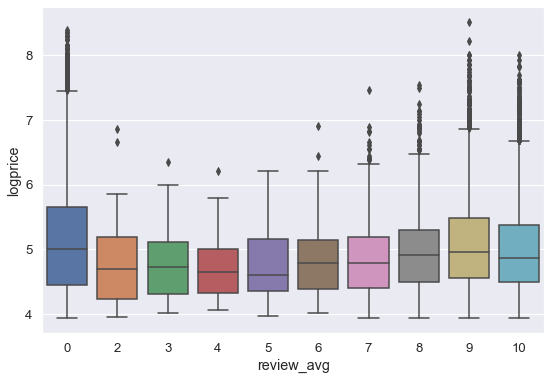

In [19]:
sns.boxplot(data=df, x='review_avg', y=response);

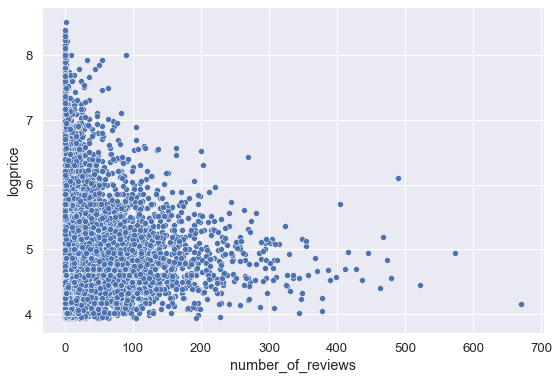

In [20]:
# No. of reviews
sns.scatterplot(data=df, x='number_of_reviews', y=response)
plt.show()

# ------------------------------------

## 2.4 Original binary predictors

In [21]:
# Convert t/f to 1/0
binary = {'t':1, 'f':0}
for i in ['host_is_superhost', 'host_identity_verified', 'instant_bookable', 'has_availability']:
    df.replace({i:binary},inplace=True)

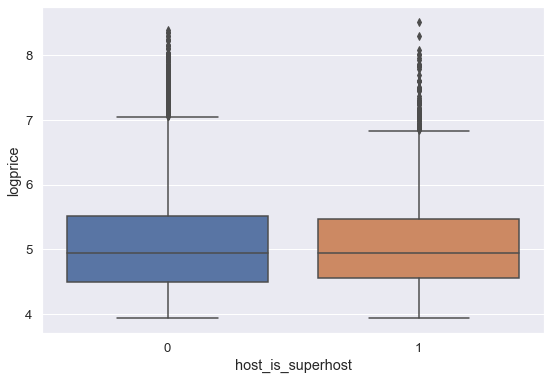

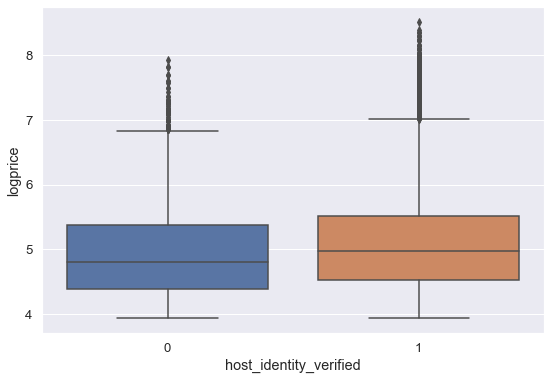

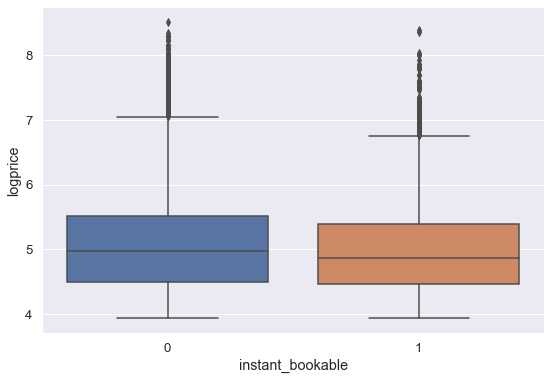

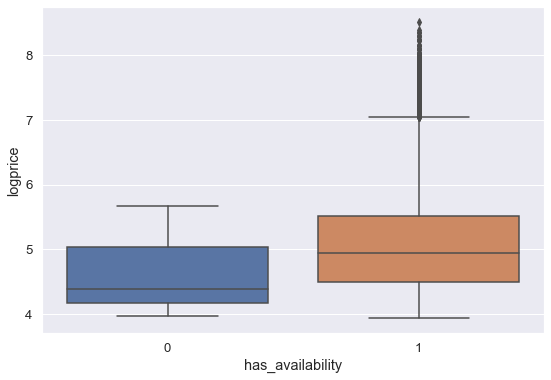

In [22]:
for i in ['host_is_superhost', 'host_identity_verified', 'instant_bookable', 'has_availability']:
    sns.boxplot(data=df, x=i, y=response)
    plt.show()

# ------------------------------------

## 2.5 Bathrooms

In [23]:
# Convert bathrooms_text to number of bathrooms
print(df['bathrooms_text'].unique())

def clean(x):
    if type(x) == float:
        return x
    elif x in ['18 baths', '18 shared baths']:
        return 18
    elif x == '10 baths':
        return 10
    elif x in ['Private half-bath', 'Half-bath', 'Shared half-bath']:
        return 1 # 0/1 ?
    else:
        return int(x[0])

df['bathrooms'] = df['bathrooms_text'].map(clean)
df = df.drop(columns='bathrooms_text', axis=1)

['1 shared bath' '3.5 baths' '1 bath' '1 private bath' '1.5 baths'
 '2 baths' '2.5 baths' '3 baths' '2 shared baths' '2.5 shared baths'
 '5.5 baths' '1.5 shared baths' '3 shared baths' '4 baths' '4.5 baths'
 '6 shared baths' '0 shared baths' nan '5 shared baths' '18 baths'
 '6 baths' 'Private half-bath' '5 baths' '0 baths' '4 shared baths'
 'Half-bath' 'Shared half-bath' '18 shared baths' '3.5 shared baths'
 '10 baths' '4.5 shared baths' '7 shared baths' '5.5 shared baths'
 '8 baths']


In [24]:
df['bathrooms'].isnull().sum()

15

In [25]:
df.loc[df['bathrooms'].isnull(), :]

,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,has_availability,availability_30,availability_60,availability_90,availability_365,instant_bookable,number_of_reviews,price,logprice,review_avg,bathrooms
570,0,1,Sydney,-33.89637,151.20205,Shared room,1,1.0,1.0,1,29,59,89,90,0,0,85.0,4.442651,0,NaN
1698,0,1,Sydney,-33.87734,151.22095,Private room,2,1.0,1.0,1,0,0,0,0,0,0,275.0,5.616771,0,NaN
2501,0,0,Waverley,-33.89455,151.27344,Private room,1,1.0,NaN,1,30,60,90,365,0,0,100.0,4.605170,0,NaN
4803,0,1,Penrith,-33.86749,150.81638,Private room,6,3.0,3.0,1,0,0,0,0,0,0,647.0,6.472346,0,NaN
4984,0,1,Strathfield,-33.88268,151.08529,Shared room,1,1.0,NaN,1,30,60,90,365,0,6,290.0,5.669881,8,NaN
5963,0,1,Warringah,-33.76868,151.29166,Entire home/apt,5,3.0,5.0,1,1,1,1,1,0,2,485.0,6.184149,10,NaN
6001,0,1,Waverley,-33.90661,151.25637,Entire home/apt,3,2.0,NaN,1,23,53,83,358,0,1,200.0,5.298317,9,NaN
7095,0,1,Pittwater,-33.64921,151.30404,Private room,2,NaN,1.0,1,28,58,88,363,1,0,250.0,5.521461,0,NaN
10655,0,0,City Of Kogarah,-33.97382,151.09091,Private room,2,1.0,1.0,1,0,0,0,1,0,5,85.0,4.442651,9,NaN
18132,0,1,Sydney,-33.88525,151.19913,Entire home/apt,2,NaN,NaN,1,29,59,89,364,0,0,70.0,4.248495,0,NaN


In [26]:
df['bathrooms'].fillna(1, inplace=True)

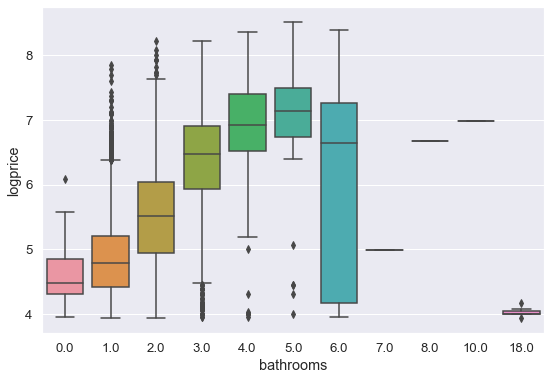

In [27]:
sns.boxplot(data=df, x='bathrooms', y=response);

In [28]:
# Extreme values
df[df['bathrooms']==18]

,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,has_availability,availability_30,availability_60,availability_90,availability_365,instant_bookable,number_of_reviews,price,logprice,review_avg,bathrooms
633,0,1,North Sydney,-33.83912,151.20513,Hotel room,2,1.0,1.0,1,29,59,89,364,0,6,55.0,4.007333,9,18.0
1176,0,1,North Sydney,-33.82953,151.21059,Hotel room,2,1.0,2.0,1,29,59,89,364,0,10,59.0,4.077537,9,18.0
2722,0,1,North Sydney,-33.82806,151.21014,Private room,2,1.0,1.0,1,29,59,89,90,0,0,57.0,4.043051,0,18.0
2916,0,1,North Sydney,-33.82824,151.21041,Hotel room,2,1.0,1.0,1,29,59,89,364,0,9,55.0,4.007333,8,18.0
5209,0,1,North Sydney,-33.82922,151.20913,Hotel room,1,1.0,1.0,1,29,59,89,364,0,4,51.0,3.931826,9,18.0
7178,0,1,North Sydney,-33.82843,151.20911,Hotel room,2,1.0,1.0,1,29,59,89,364,0,7,55.0,4.007333,9,18.0
8334,0,1,North Sydney,-33.82993,151.20989,Private room,2,1.0,1.0,1,29,59,89,364,0,0,55.0,4.007333,0,18.0
18506,0,1,North Sydney,-33.82958,151.21079,Hotel room,2,1.0,1.0,1,29,59,89,180,0,0,65.0,4.174387,0,18.0


In [29]:
df.loc[df['bathrooms']==18, 'bathrooms'] = 1

In [30]:
df[df['bathrooms']>=6].sort_values('price')

,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,has_availability,availability_30,availability_60,availability_90,availability_365,instant_bookable,number_of_reviews,price,logprice,review_avg,bathrooms
19059,0,1,Sydney,-33.88337,151.18077,Private room,2,1.0,2.0,1,30,60,90,365,0,45,52.0,3.951244,9,6.0
19149,0,1,Sydney,-33.88260,151.18026,Private room,2,1.0,1.0,1,30,60,90,365,1,19,55.0,4.007333,9,6.0
20250,0,1,Sydney,-33.88273,151.18026,Private room,1,1.0,1.0,1,29,59,89,364,0,9,59.0,4.077537,9,6.0
5713,0,1,Sydney,-33.87193,151.22449,Private room,4,1.0,4.0,1,0,0,0,0,0,0,65.0,4.174387,0,6.0
273,0,1,Sydney,-33.87075,151.22311,Private room,2,1.0,1.0,1,30,60,90,365,0,6,65.0,4.174387,8,6.0
15076,1,1,Waverley,-33.89331,151.25970,Private room,2,1.0,2.0,1,27,53,83,257,1,2,146.0,4.983607,10,7.0
5094,0,0,Pittwater,-33.70053,151.30259,Entire home/apt,4,1.0,4.0,1,29,59,89,364,0,2,200.0,5.298317,10,6.0
20117,0,0,Liverpool,-33.93137,150.64336,Entire home/apt,4,1.0,4.0,1,29,59,89,364,0,0,200.0,5.298317,0,6.0
2146,0,1,Campbelltown,-34.02679,150.84578,Entire home/apt,16,8.0,10.0,1,0,13,43,43,0,3,643.0,6.466145,8,6.0
18639,1,1,Sydney,-33.85975,151.20205,Entire home/apt,16,12.0,19.0,1,0,0,0,0,1,0,789.0,6.670766,0,8.0


In [31]:
temp = list(df[df['bathrooms']>=6].sort_values('price').index)[:8]
df.loc[temp, 'bathrooms'] = 1

df.loc[df['bathrooms']>6, 'bathrooms'] = 6

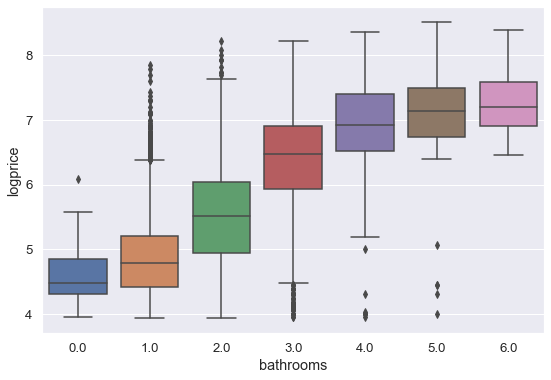

In [32]:
sns.boxplot(data=df, x='bathrooms', y=response);

# ------------------------------------

## 2.6 Availability

In [33]:
for i in ['availability_30', 'availability_60', 'availability_90', 'availability_365']:
    df.loc[df[i] > 0, i] = 1

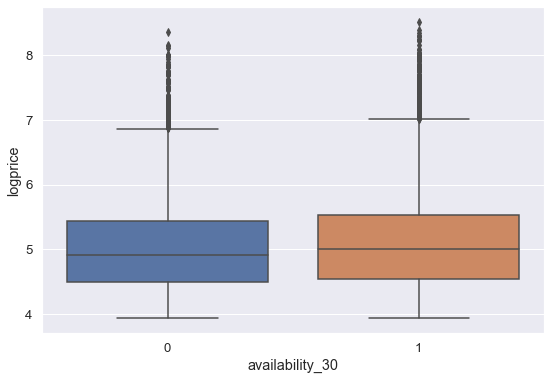

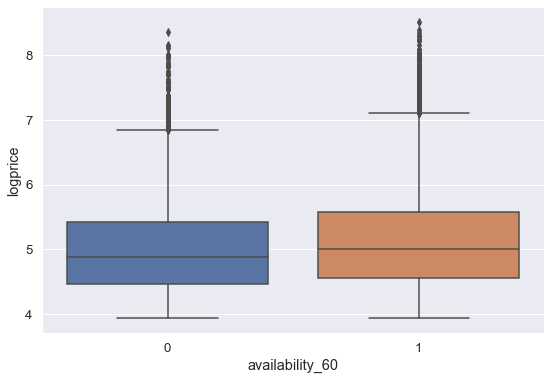

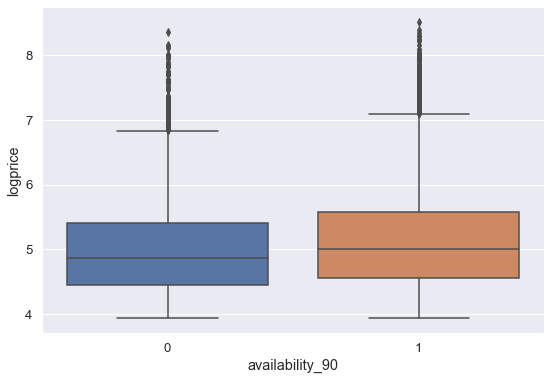

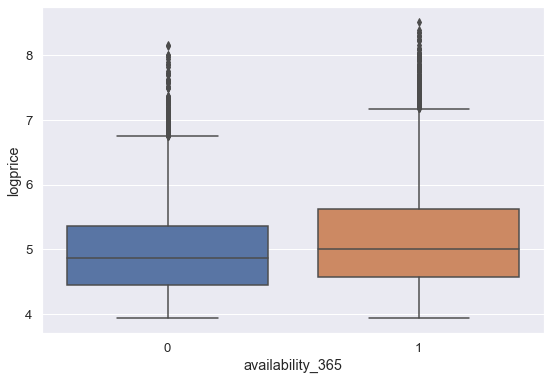

In [34]:
for i in ['availability_30', 'availability_60', 'availability_90', 'availability_365']:
    sns.boxplot(data=df, x=i, y=response)
    plt.show()

# ------------------------------------

## 2.7 Accomodates, Bedrooms and Beds

In [35]:
# Bedrooms & Beds (Discrete values)
for i in ['bedrooms', 'beds']:
    df[i] = df[i].fillna(df[i].median())

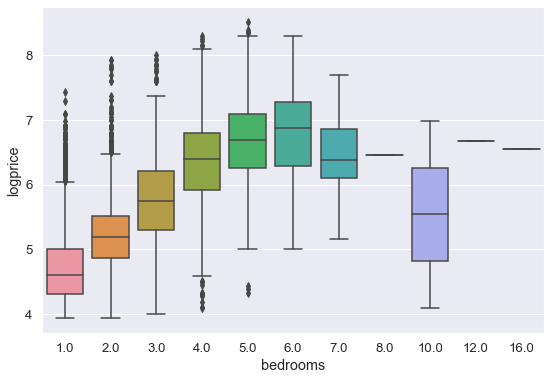

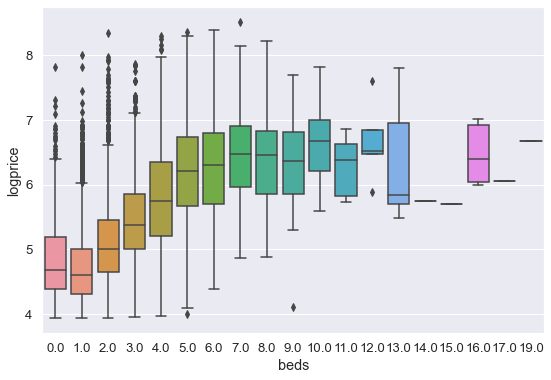

In [36]:
for i in ['bedrooms', 'beds']:
    sns.boxplot(data=df, x=i, y=response)
    plt.show()

In [37]:
df.loc[df['beds'] > 7, 'beds'] = 7
df.loc[df['bedrooms'] > 7, 'bedrooms'] = 7

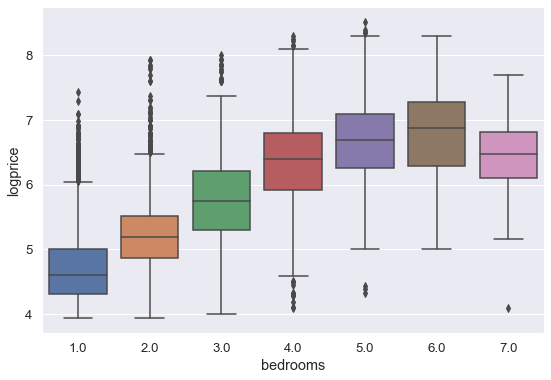

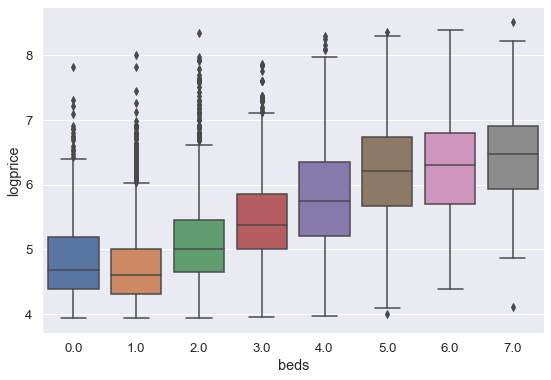

In [38]:
for i in ['bedrooms', 'beds']:
    sns.boxplot(data=df, x=i, y=response)
    plt.show()

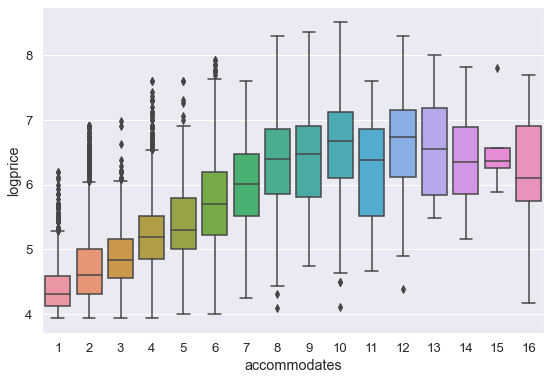

In [39]:
# Accomodates df['accommodates']
sns.boxplot(data=df, x='accommodates', y=response);

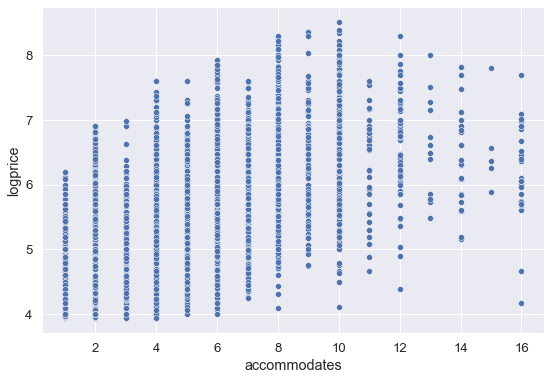

In [40]:
sns.scatterplot(data=df, y='logprice', x='accommodates');

In [41]:
df.loc[df['accommodates'] > 10, 'accommodates'] = 7

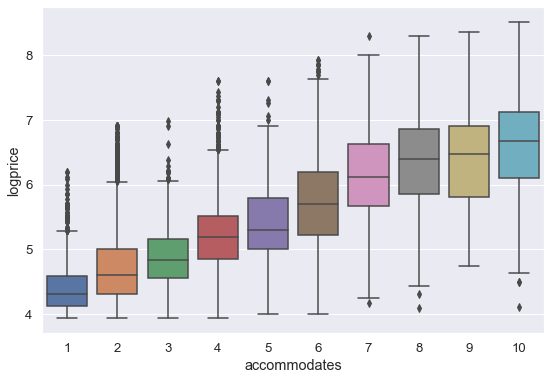

In [42]:
sns.boxplot(data=df, x='accommodates', y=response);

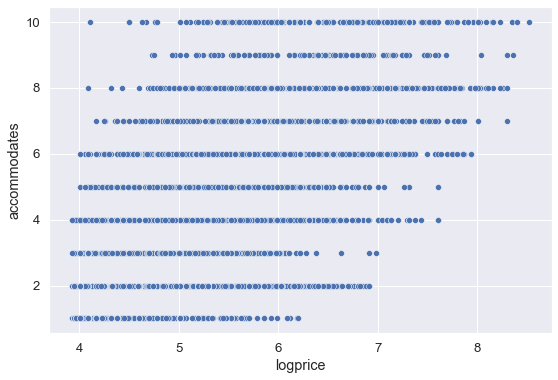

In [43]:
sns.scatterplot(data=df, y='accommodates', x='logprice');

# ------------------------------------

## 2.8 Room types

In [44]:
# Room type
df['room_type'].value_counts()

Entire home/apt    14066
Private room        6076
Hotel room           150
Shared room          116
Name: room_type, dtype: int64

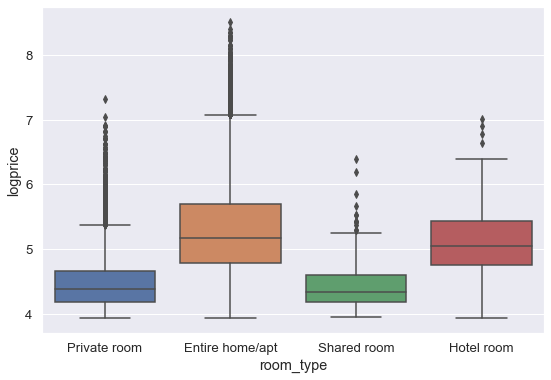

In [45]:
sns.boxplot(data=df, x='room_type', y=response);

In [46]:
# 0: small, 1: big
r_type = {'Private room':0, 'Entire home/apt':1, 'Shared room':0, 'Hotel room':1}
df['room_type'].replace(r_type, inplace=True)

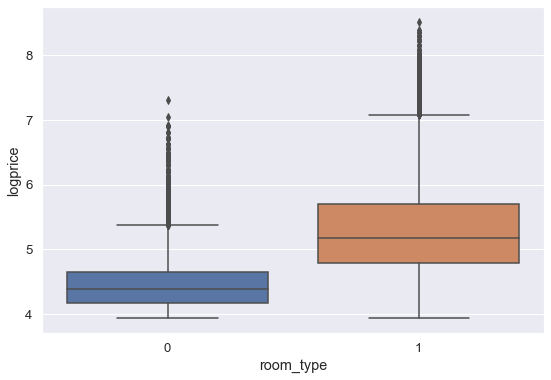

In [47]:
sns.boxplot(data=df, x='room_type', y=response);

# ------------------------------------

## 2.9 Latitude, Longitutde and Neighborhood

In [48]:
# Latitude, Longitutde and Neighbor ('neighbourhood_cleansed', 'latitude', 'longitude')
df[['neighbourhood_cleansed', 'latitude', 'longitude']]

,neighbourhood_cleansed,latitude,longitude
0,Sydney,-33.88600,151.22138
1,Sydney,-33.89147,151.17989
2,Sydney,-33.88238,151.21147
3,Parramatta,-33.81528,151.00074
4,Ashfield,-33.88649,151.13558
...,...,...,...
20403,Warringah,-33.72598,151.29911
20404,Lane Cove,-33.82395,151.18136
20405,Marrickville,-33.89810,151.16844
20406,Randwick,-33.94180,151.26463


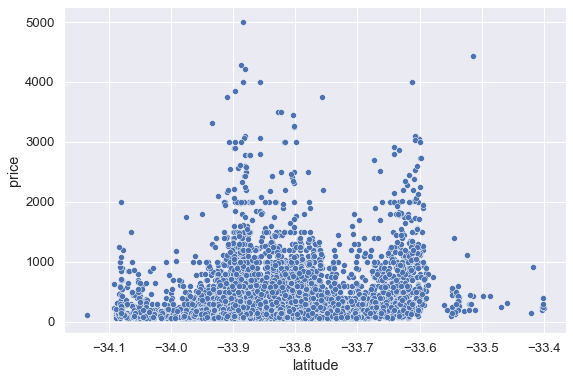

In [49]:
sns.scatterplot(data=df, x='latitude', y='price');

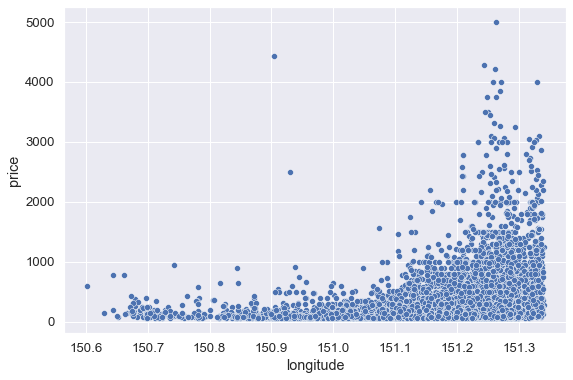

In [50]:
sns.scatterplot(data=df, x='longitude', y='price');

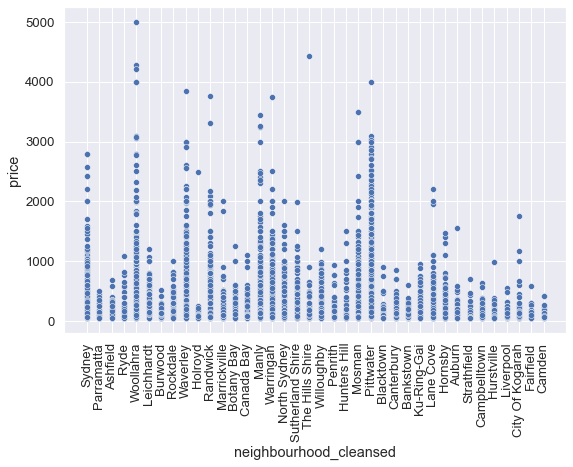

In [51]:
sns.scatterplot(data=df, x='neighbourhood_cleansed', y='price')
plt.xticks(rotation=90)
plt.show()

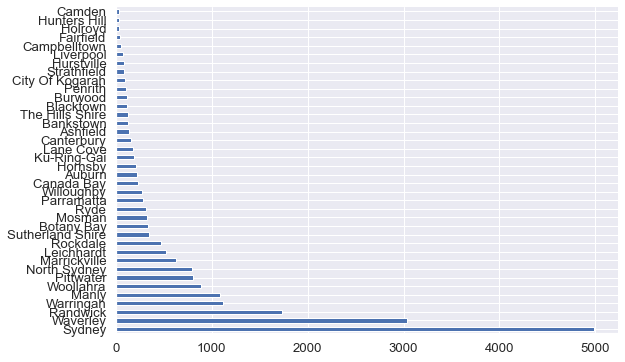

In [52]:
df['neighbourhood_cleansed'].value_counts().plot(kind='barh')
sns.despine()
plt.show()

In [54]:
# Encoding for 'neighbourhood_cleansed'

# Data leakage

from category_encoders.cat_boost import CatBoostEncoder

predictor = ['neighbourhood_cleansed']

encoder = CatBoostEncoder().fit(df[predictor], df[response]) 
df['neighbor_cb'] = encoder.transform(df[predictor])

In [55]:
df = df.drop('neighbourhood_cleansed', axis=1)

# ------------------------------------

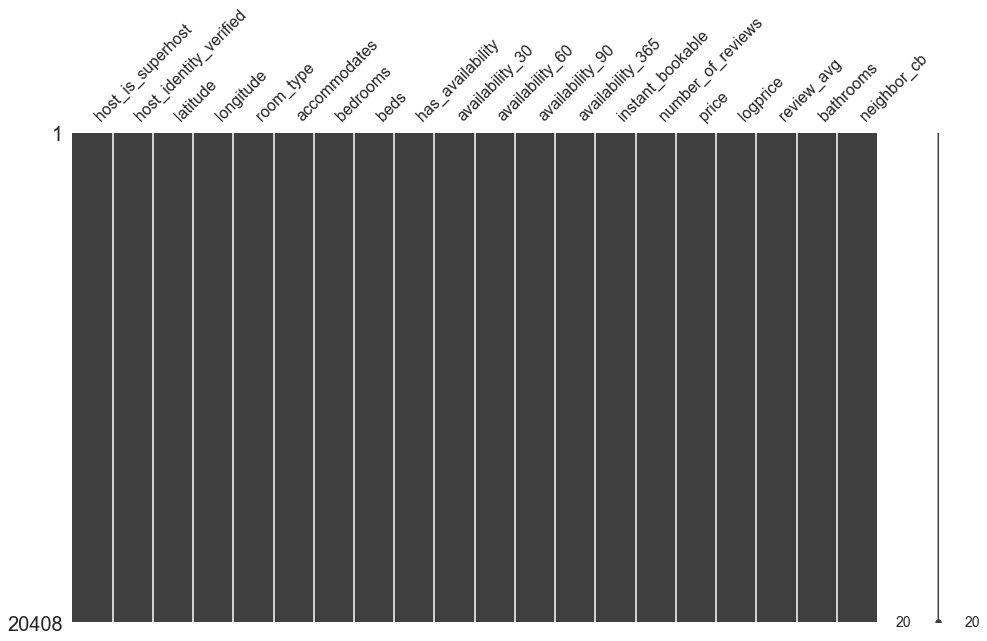

In [56]:
msno.matrix(df, figsize=(16, 9))
plt.show()

In [57]:
df_fixed = df

# ------------------------------------

### Confirm the data set

In [58]:
df = df_fixed[['host_is_superhost', 'host_identity_verified',
         'neighbor_cb', 'latitude', 'longitude',
         'room_type', 'accommodates', 'beds', 'bedrooms', 'bathrooms',
         'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
         'instant_bookable',
         'number_of_reviews',
         'review_avg',
         'price', 'logprice']]

In [59]:
df

,host_is_superhost,host_identity_verified,neighbor_cb,latitude,longitude,room_type,accommodates,beds,bedrooms,bathrooms,has_availability,availability_30,availability_60,availability_90,availability_365,instant_bookable,number_of_reviews,review_avg,price,logprice
0,0,1,4.938331,-33.88600,151.22138,0,2,1.0,1.0,1.0,1,1,1,1,1,1,0,0,85.0,4.442651
1,0,1,4.938331,-33.89147,151.17989,1,6,3.0,3.0,3.0,1,0,0,0,0,1,5,10,400.0,5.991465
2,0,1,4.938331,-33.88238,151.21147,1,2,1.0,1.0,1.0,1,0,0,0,0,1,2,9,229.0,5.433722
3,0,1,4.698166,-33.81528,151.00074,0,2,1.0,1.0,1.0,1,0,0,0,0,1,2,10,220.0,5.393628
4,0,0,4.738938,-33.88649,151.13558,1,4,2.0,2.0,1.0,1,1,1,1,1,1,14,9,127.0,4.844187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20403,0,1,5.324948,-33.72598,151.29911,1,2,1.0,1.0,1.0,1,0,0,0,0,0,1,10,76.0,4.330733
20404,0,1,5.075097,-33.82395,151.18136,1,4,2.0,2.0,1.0,1,1,1,1,1,1,31,9,139.0,4.934474
20405,0,1,4.731647,-33.89810,151.16844,1,2,1.0,1.0,1.0,1,0,0,0,0,0,2,9,99.0,4.595120
20406,0,0,5.005595,-33.94180,151.26463,1,2,1.0,1.0,1.0,1,0,0,0,0,0,1,0,76.0,4.330733


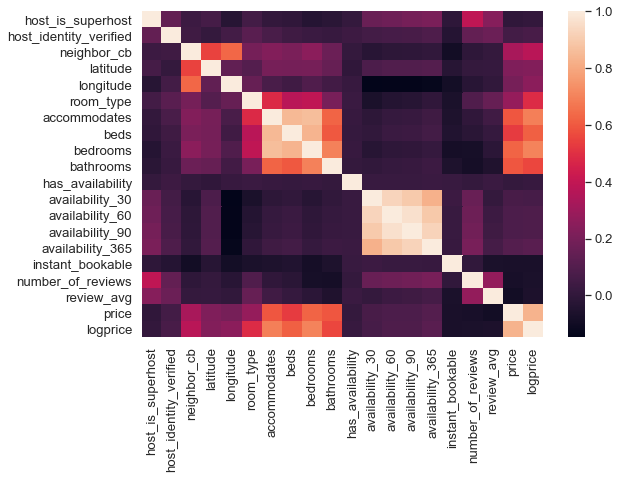

In [60]:
sns.heatmap(df.corr());

# 3. Training set & Validation set

In [61]:
exclude = ['price', 'logprice']

predictors = [x for x in df.columns if x not in exclude]
predictors

['host_is_superhost',
 'host_identity_verified',
 'neighbor_cb',
 'latitude',
 'longitude',
 'room_type',
 'accommodates',
 'beds',
 'bedrooms',
 'bathrooms',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'instant_bookable',
 'number_of_reviews',
 'review_avg']

In [62]:
response = 'logprice'

In [63]:
data = df

In [64]:
# Train-Valid split
index_train, index_valid = train_test_split(data.index, train_size=0.7, random_state=77)

train = data.loc[index_train, :].copy()
valid = data.loc[index_valid, :].copy()

scaler = StandardScaler()

train.loc[:, predictors] = scaler.fit_transform(train.loc[:, predictors])
valid.loc[:, predictors] = scaler.transform(valid.loc[:, predictors])

In [65]:
X_train = train[predictors]
X_valid = valid[predictors]

y_train = np.ravel(train[response])
y_valid = np.ravel(valid[response])

# 4. Model building

## 4.1 Linear regression - Benchmark

In [66]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

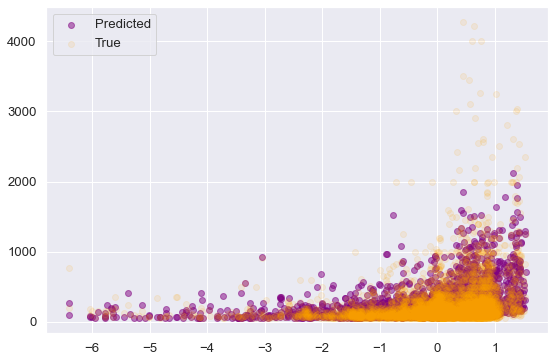

In [67]:
y_pred1 = lr.predict(X_valid)
plt.scatter(X_valid.iloc[:, 4], np.exp(y_pred1), color='purple', alpha=0.5, label='Predicted')
plt.scatter(X_valid.iloc[:, 4], np.exp(y_valid), color='orange', alpha=0.1, label='True')

plt.legend()
plt.show()

### Residual diagnostic

In [68]:
resid = np.exp(y_valid) - np.exp(y_pred1)

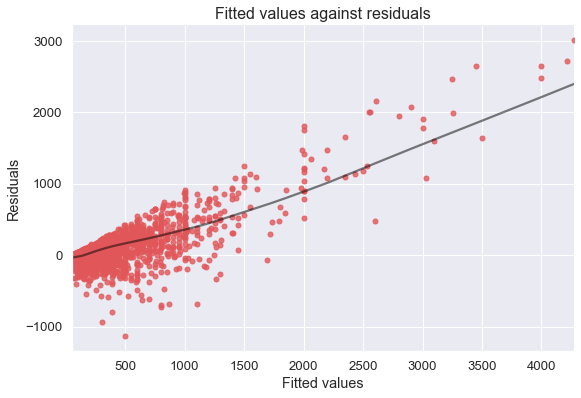

In [69]:
fig, ax = plt.subplots()
sns.regplot(x=np.exp(y_valid), y=resid, ci=None, lowess= True, scatter_kws={'s':25, 'color': colours[2]}, 
            line_kws={'color':'black', 'alpha':0.5})
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Fitted values against residuals', fontsize=16)
sns.despine()
plt.show()

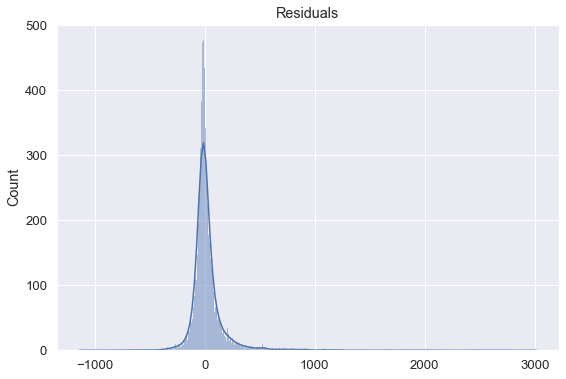

In [70]:
sns.histplot(resid, kde=True)
plt.title('Residuals')
plt.show()

In [71]:
r2_score(np.exp(y_valid), np.exp(y_pred1))

0.5675229349367754

In [72]:
for i in range(len(predictors)):
    print(f"{predictors[i]}'s coefficient is {lr.coef_[i].round(4)}\n")

host_is_superhost's coefficient is 0.016

host_identity_verified's coefficient is 0.0112

neighbor_cb's coefficient is 0.0937

latitude's coefficient is -0.0087

longitude's coefficient is 0.0815

room_type's coefficient is 0.1654

accommodates's coefficient is 0.202

beds's coefficient is -0.0247

bedrooms's coefficient is 0.202

bathrooms's coefficient is 0.1093

has_availability's coefficient is -0.0003

availability_30's coefficient is 0.0444

availability_60's coefficient is 0.0337

availability_90's coefficient is -0.0779

availability_365's coefficient is 0.1024

instant_bookable's coefficient is -0.0018

number_of_reviews's coefficient is -0.045

review_avg's coefficient is -0.0679



## 4.2 Lasso

In [73]:
from sklearn.linear_model import Lasso

l1 = Lasso(alpha=0.2)
l1.fit(X_train, y_train)

Lasso(alpha=0.2)

In [74]:
for i in range(len(predictors)):
    if l1.coef_[i] != 0:
        print(f"{predictors[i]}'s coefficient is {l1.coef_[i].round(4)}\n")

room_type's coefficient is 0.0224

accommodates's coefficient is 0.1664

bedrooms's coefficient is 0.1788



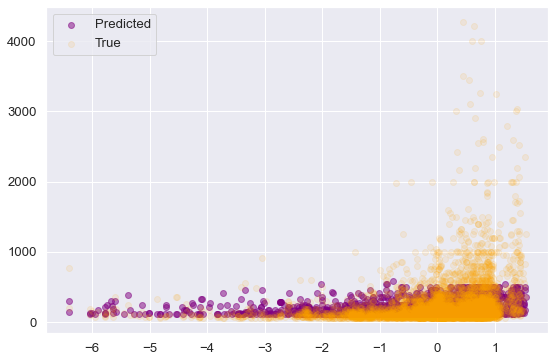

In [75]:
y_pred2 = l1.predict(X_valid)
plt.scatter(X_valid.iloc[:, 4], np.exp(y_pred2), color='purple', alpha=0.5, label='Predicted')
plt.scatter(X_valid.iloc[:, 4], np.exp(y_valid), color='orange', alpha=0.1, label='True')

plt.legend()
plt.show()

### Residual diagnostic

In [76]:
resid = np.exp(y_valid) - np.exp(y_pred2)

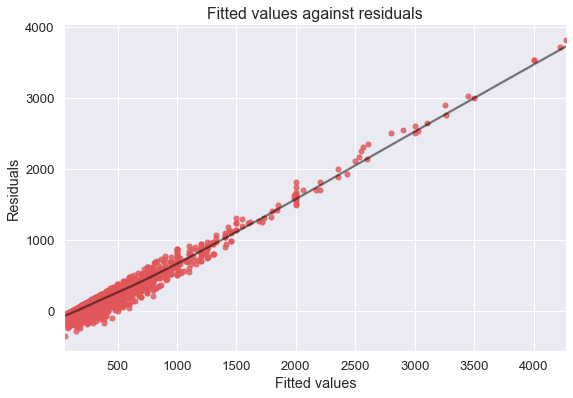

In [77]:
fig, ax = plt.subplots()
sns.regplot(x=np.exp(y_valid), y=resid, ci=None, lowess= True, scatter_kws={'s':25, 'color': colours[2]}, 
            line_kws={'color':'black', 'alpha':0.5})
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Fitted values against residuals', fontsize=16)
sns.despine()
plt.show()

In [78]:
r2_score(np.exp(y_valid), np.exp(y_pred2))

0.23320245709794085

## 4.3 K Nearest Neighbors

In [79]:
# import optuna

# rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=77)

# # Create objective function
# def objective(trial):

#     # Suggest hyperparamter
#     k = trial.suggest_int('k', 1, 31)

#     # The rest is scikit-learn
#     knn =  KNeighborsRegressor(n_neighbors=k)
    
#     scores = cross_val_score(knn, X_train, y_train, cv = rkf, scoring = 'neg_mean_squared_error')
#     rmse = np.sqrt(-1*np.mean(scores))

#     return rmse

# # Create and run study
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=20, timeout=600)

In [80]:
# [I 2021-10-22 15:16:13,899] A new study created in memory with name: no-name-ae30b86c-92fd-46bc-a2f1-4209cdcf1226
# [I 2021-10-22 15:17:03,655] Trial 0 finished with value: 0.45953828257793805 and parameters: {'k': 21}. Best is trial 0 with value: 0.45953828257793805.
# [I 2021-10-22 15:17:53,701] Trial 1 finished with value: 0.45892896180325365 and parameters: {'k': 24}. Best is trial 1 with value: 0.45892896180325365.
# [I 2021-10-22 15:18:39,681] Trial 2 finished with value: 0.45972165553772437 and parameters: {'k': 16}. Best is trial 1 with value: 0.45892896180325365.
# [I 2021-10-22 15:19:27,273] Trial 3 finished with value: 0.4596104091071188 and parameters: {'k': 19}. Best is trial 1 with value: 0.45892896180325365.
# [I 2021-10-22 15:20:13,285] Trial 4 finished with value: 0.45972165553772437 and parameters: {'k': 16}. Best is trial 1 with value: 0.45892896180325365.
# [I 2021-10-22 15:20:52,253] Trial 5 finished with value: 0.47113988963727044 and parameters: {'k': 7}. Best is trial 1 with value: 0.45892896180325365.
# [I 2021-10-22 15:21:28,701] Trial 6 finished with value: 0.4805866442878926 and parameters: {'k': 5}. Best is trial 1 with value: 0.45892896180325365.
# [I 2021-10-22 15:22:17,061] Trial 7 finished with value: 0.45962272378162944 and parameters: {'k': 20}. Best is trial 1 with value: 0.45892896180325365.
# [I 2021-10-22 15:23:01,249] Trial 8 finished with value: 0.4611863990755502 and parameters: {'k': 13}. Best is trial 1 with value: 0.45892896180325365.
# [I 2021-10-22 15:23:51,835] Trial 9 finished with value: 0.45887124727088785 and parameters: {'k': 25}. Best is trial 9 with value: 0.45887124727088785.
# [I 2021-10-22 15:24:45,889] Trial 10 finished with value: 0.45902661588184945 and parameters: {'k': 31}. Best is trial 9 with value: 0.45887124727088785.
# [I 2021-10-22 15:25:38,692] Trial 11 finished with value: 0.4588187737970164 and parameters: {'k': 28}. Best is trial 11 with value: 0.4588187737970164.
# [I 2021-10-22 15:26:32,507] Trial 12 finished with value: 0.45899947014939946 and parameters: {'k': 30}. Best is trial 11 with value: 0.4588187737970164.

In [81]:
knn = KNeighborsRegressor(n_neighbors=28)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=28)

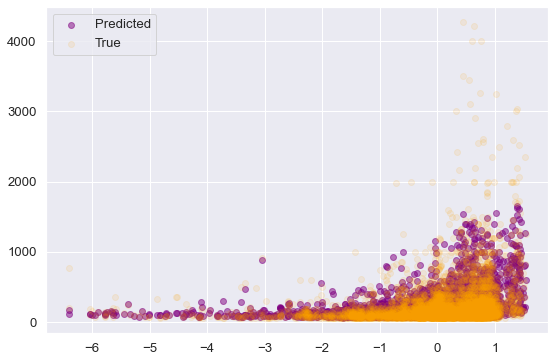

In [82]:
y_pred3 = knn.predict(X_valid)
plt.scatter(X_valid.iloc[:, 4], np.exp(y_pred3), color='purple', alpha=0.5, label='Predicted')
plt.scatter(X_valid.iloc[:, 4], np.exp(y_valid), color='orange', alpha=0.1, label='True')

plt.legend()
plt.show()

### Residual diagnostic

In [83]:
resid = np.exp(y_valid) - np.exp(y_pred3)

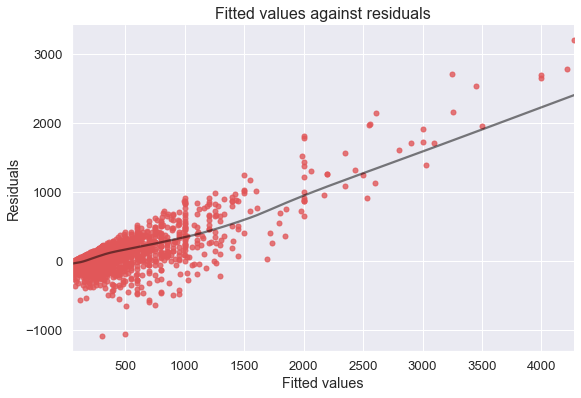

In [84]:
fig, ax = plt.subplots()
sns.regplot(x=np.exp(y_valid), y=resid, ci=None, lowess= True, scatter_kws={'s':25, 'color': colours[2]}, 
            line_kws={'color':'black', 'alpha':0.5})
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Fitted values against residuals', fontsize=16)
sns.despine()
plt.show()

In [85]:
r2_score(np.exp(y_valid), np.exp(y_pred1))

0.5675229349367754

## 4.4 Random Forest

In [86]:
# import optuna
# from optuna.samplers import TPESampler

# def objective(trial):
#     max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
#     max_depth = trial.suggest_int('max_depth', 10, 100)
    
#     rf = RandomForestRegressor(n_estimators=100,
#                                criterion = 'mse',
#                                max_features = max_features,
#                                min_samples_leaf = min_samples_leaf,
#                                max_depth = max_depth,
#                                random_state = 77)

#     scores = cross_val_score(rf, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
#     rmse = np.sqrt(-1*np.mean(scores))

#     return rmse

# sampler = TPESampler(seed=42)
# study = optuna.create_study(direction='minimize', sampler=sampler)
# study.optimize(objective, n_trials=30, timeout=600)

In [87]:
# study.best_params

# {'max_depth': 68, 'max_features': 'log2', 'min_samples_leaf': 3}

In [88]:
params = {'max_depth': 68, 'max_features': 'log2', 'min_samples_leaf': 3}

rf = RandomForestRegressor(random_state=77, **params)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=68, max_features='log2', min_samples_leaf=3,
                      random_state=77)

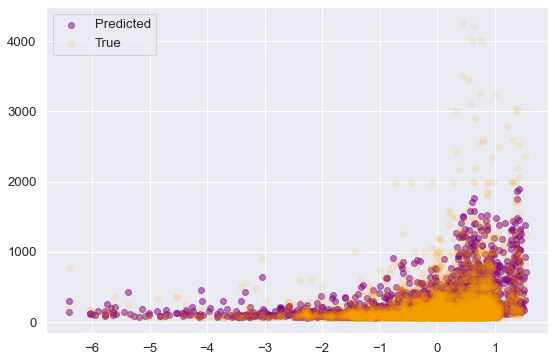

In [89]:
y_pred4 = rf.predict(X_valid)
plt.scatter(X_valid.iloc[:, 4], np.exp(y_pred4), color='purple', alpha=0.5, label='Predicted')
plt.scatter(X_valid.iloc[:, 4], np.exp(y_valid), color='orange', alpha=0.1, label='True')

plt.legend()
plt.show()

### Residual diagnostic

In [90]:
resid = np.exp(y_valid) - np.exp(y_pred4)

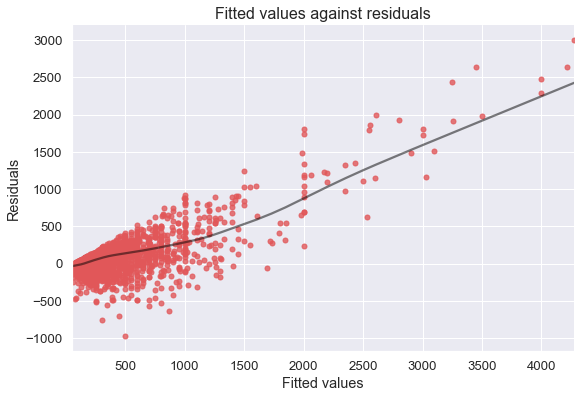

In [91]:
fig, ax = plt.subplots()
sns.regplot(x=np.exp(y_valid), y=resid, ci=None, lowess= True, scatter_kws={'s':25, 'color': colours[2]}, 
            line_kws={'color':'black', 'alpha':0.5})
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Fitted values against residuals', fontsize=16)
sns.despine()
plt.show()

In [92]:
r2_score(np.exp(y_valid), np.exp(y_pred4))

0.6205654490830197

## 4.5 Generalized Additive Model

In [93]:
X_train.columns

Index(['host_is_superhost', 'host_identity_verified', 'neighbor_cb',
       'latitude', 'longitude', 'room_type', 'accommodates', 'beds',
       'bedrooms', 'bathrooms', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'instant_bookable', 'number_of_reviews', 'review_avg'],
      dtype='object')

In [94]:
from pygam import LinearGAM, s, f, l

gam = LinearGAM(l(0) + l(1) + s(2)
                + l(3) + s(4) + l(5) + s(6) + s(7)
                + s(8) + s(9) + l(10) + l(11)
                + l(12) + l(13) + l(14)
                + l(15) + l(16) + s(17))

In [95]:
# import optuna
# from optuna.samplers import TPESampler

# def objective(trial):

#     lambdas = []
#     for j in range(len(predictors)):
#         lambdas.append(trial.suggest_loguniform(f'lambda_{j}', 1e-4, 10000.0))
                               
#     model = LinearGAM(l(0) + l(1) + s(2)
#                 + l(3) + s(4) + l(5) + s(6) + s(7)
#                 + s(8) + s(9) + l(10) + l(11)
#                 + l(12) + l(13) + l(14)
#                 + l(15) + l(16) + s(17), lam=lambdas)
#     model.fit(X_train, y_train)
    
#     return model.statistics_['GCV']

# sampler = TPESampler(seed=42)  # makes the sampler behave in a deterministic way
# study = optuna.create_study(direction='minimize', sampler=sampler) # TPE is a method for Bayesian optimisation
# study.optimize(objective, n_trials=10000, timeout=600) 

In [96]:
# list(study.best_params.values())

# [695.4100162029954,
#  0.021238263931566536,
#  0.00023241470531740142,
#  0.3281649479331393,
#  4.930383103525756,
#  0.049310193639506485,
#  0.014901741528306502,
#  4455.21387790964,
#  294.5375966246861,
#  2.734111178479073,
#  67.39805749254054,
#  6.720562255141135,
#  407.17524968441484,
#  10.004519682671312,
#  0.014228061850110519,
#  0.07709950626072803,
#  0.008441604850924466,
#  3636.9988585817737]

In [97]:
lambdas = [695.4100162029954,
 0.021238263931566536,
 0.00023241470531740142,
 0.3281649479331393,
 4.930383103525756,
 0.049310193639506485,
 0.014901741528306502,
 4455.21387790964,
 294.5375966246861,
 2.734111178479073,
 67.39805749254054,
 6.720562255141135,
 407.17524968441484,
 10.004519682671312,
 0.014228061850110519,
 0.07709950626072803,
 0.008441604850924466,
 3636.9988585817737]

gam = LinearGAM(l(0) + l(1) + s(2)
                + l(3) + s(4) + l(5) + s(6) + s(7)
                + s(8) + s(9) + l(10) + l(11)
                + l(12) + l(13) + l(14)
                + l(15) + l(16) + s(17), lam = lambdas)

gam.fit(X_train, y_train)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=l(0) + l(1) + s(2) + l(3) + s(4) + l(5) + s(6) + s(7) + s(8) + s(9) + l(10) + l(11) + l(12) + l(13) + l(14) + l(15) + l(16) + s(17) + intercept,
   tol=0.0001, verbose=False)

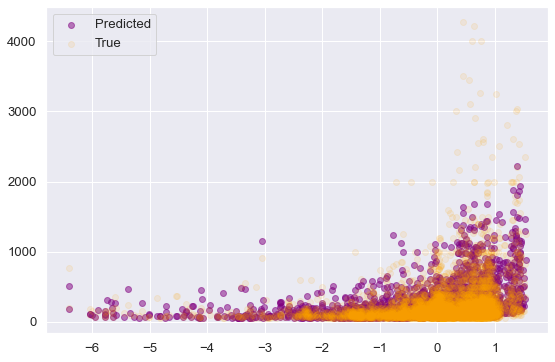

In [98]:
y_pred5 = gam.predict(X_valid)
plt.scatter(X_valid.iloc[:, 4], np.exp(y_pred5), color='purple', alpha=0.5, label='Predicted')
plt.scatter(X_valid.iloc[:, 4], np.exp(y_valid), color='orange', alpha=0.1, label='True')

plt.legend()
plt.show()

### Residual diagnostic

In [99]:
resid = np.exp(y_valid) - np.exp(y_pred5)

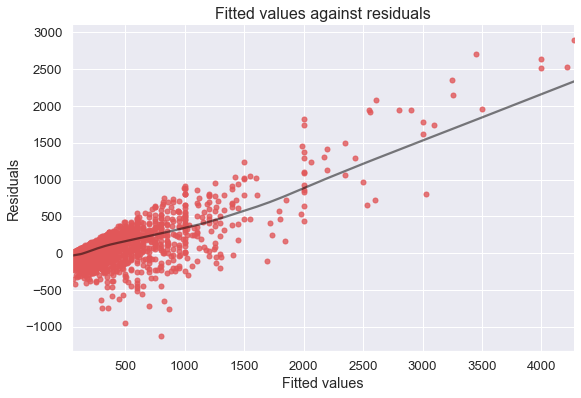

In [100]:
fig, ax = plt.subplots()
sns.regplot(x=np.exp(y_valid), y=resid, ci=None, lowess= True, scatter_kws={'s':25, 'color': colours[2]}, 
            line_kws={'color':'black', 'alpha':0.5})
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Fitted values against residuals', fontsize=16)
sns.despine()
plt.show()

In [101]:
r2_score(np.exp(y_valid), np.exp(y_pred5))

0.5909033130533516

## 4.6 Gradient Boosting

In [102]:
%%time

from sklearn.ensemble import GradientBoostingRegressor

# Hand tuning
gb = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 8, n_estimators= 2000, subsample = 0.6, random_state=77)
gb.fit(X_train, y_train)

Wall time: 56 s


GradientBoostingRegressor(learning_rate=0.01, max_depth=8, n_estimators=2000,
                          random_state=77, subsample=0.6)

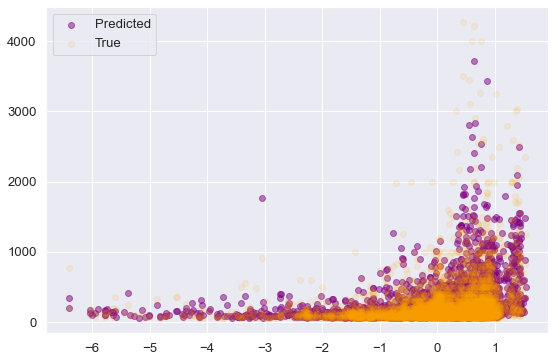

In [103]:
y_pred6 = gb.predict(X_valid)
plt.scatter(X_valid.iloc[:, 4], np.exp(y_pred6), color='purple', alpha=0.5, label='Predicted')
plt.scatter(X_valid.iloc[:, 4], np.exp(y_valid), color='orange', alpha=0.1, label='True')

plt.legend()
plt.show()

### Residual diagnostic

In [104]:
resid = np.exp(y_valid) - np.exp(y_pred6)

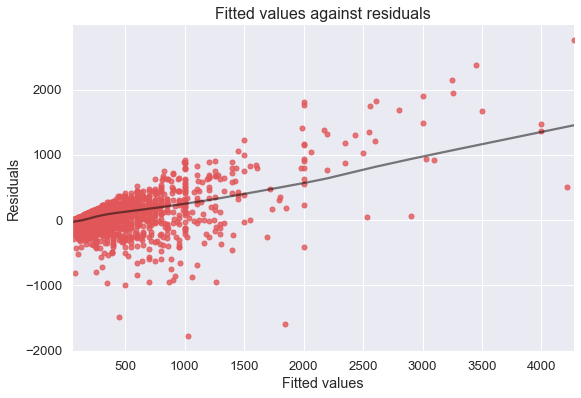

In [105]:
fig, ax = plt.subplots()
sns.regplot(x=np.exp(y_valid), y=resid, ci=None, lowess= True, scatter_kws={'s':25, 'color': colours[2]}, 
            line_kws={'color':'black', 'alpha':0.5})
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Fitted values against residuals', fontsize=16)
sns.despine()
plt.show()

In [106]:
r2_score(np.exp(y_valid), np.exp(y_pred6))

0.6497556651370966

## 4.7 CatBoost

In [107]:
%%time

from catboost import CatBoostRegressor

# Use the original config
cb = CatBoostRegressor(loss_function='RMSE', verbose=0, random_seed=77)
cb.fit(X_train, y_train)

Wall time: 7.53 s


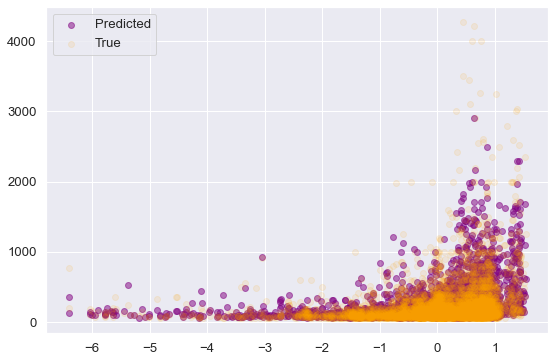

In [108]:
y_pred7 = cb.predict(X_valid)
plt.scatter(X_valid.iloc[:, 4], np.exp(y_pred7), color='purple', alpha=0.5, label='Predicted')
plt.scatter(X_valid.iloc[:, 4], np.exp(y_valid), color='orange', alpha=0.1, label='True')

plt.legend()
plt.show()

### Residual diagnostic

In [109]:
resid = np.exp(y_valid) - np.exp(y_pred7)

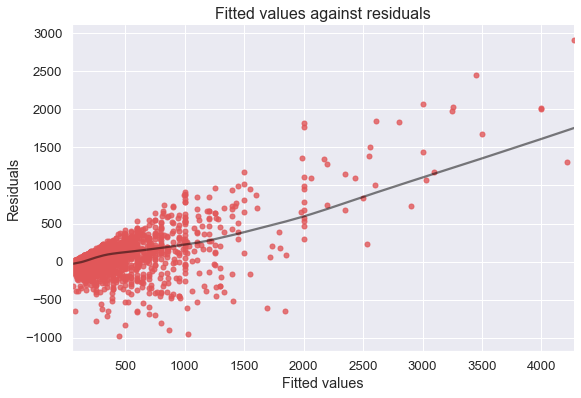

In [110]:
fig, ax = plt.subplots()
sns.regplot(x=np.exp(y_valid), y=resid, ci=None, lowess= True, scatter_kws={'s':25, 'color': colours[2]}, 
            line_kws={'color':'black', 'alpha':0.5})
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Fitted values against residuals', fontsize=16)
sns.despine()
plt.show()

In [111]:
r2_score(np.exp(y_valid), np.exp(y_pred7))

0.6627969435861224

## 4.8 LightGBM

In [112]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, y_train)
valid_data = lgb.Dataset(X_valid, y_valid, reference = train_data)

In [113]:
# from optuna.integration import LightGBMPruningCallback
# from optuna.samplers import TPESampler

# def objective(trial):
    
#     params = {
#     'feature_pre_filter': False,
#     'objective': 'regression',
#     'boosting_type': 'gbdt',
#     'learning_rate': 0.05,
#     'num_leaves': trial.suggest_int('num_leaves', 2, 64),
#     'lambda_l1': trial.suggest_loguniform('lambda_l1',  1e-8, 10.0), 
#     'lambda_l2': trial.suggest_loguniform('lambda_l2',  1e-8, 10.0), 
#     'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
#     'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
#     'feature_fraction':  trial.suggest_uniform('feature_fraction', 0.3, 1.0),
#     'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 128), 
#      }
    
#     # Instantiate pruning callback
#     pruning_callback =  LightGBMPruningCallback(trial, 'l2')
    
#     # LightGBM cross-validation
#     history = lgb.cv(params, train_data, num_boost_round = 5000, 
#                  nfold = 5, stratified = False, early_stopping_rounds = 100,
#                  callbacks = [pruning_callback])
    
#     # Save full set of parameters
#     trial.set_user_attr('params', params)
    
#     # Save the number of boosting iterations selected by early stopping
#     trial.set_user_attr('num_boost_round', len(history['l2-mean']))
    
#     return history['l2-mean'][-1] # returns CV error for the best trial

# # Instantiating the sampler to set the random seed
# sampler = TPESampler(seed=77) 

# # Instantiating the pruner
# # The min_resource should be the minimum number of trees required to reasonably judge performance
# # This can be tricky to get it right for boosting
# # See the notes in the documentation:
# # https://optuna.readthedocs.io/en/stable/reference/generated/optuna.pruners.HyperbandPruner.html
# pruner = optuna.pruners.HyperbandPruner(min_resource = 100, max_resource = 'auto', reduction_factor = 3)

# # A simpler alternative is the median pruner
# # This method prunes trials with partial performance below the median of previous trials 
# #pruner = optuna.pruners.MedianPruner(n_startup_trials = 10, n_warmup_steps = 500, interval_steps = 5)

# study = optuna.create_study(direction='minimize', sampler = sampler, pruner = pruner)
# study.optimize(objective, n_trials=600, timeout=1800)

In [114]:
# study.best_params

# {'bagging_fraction': 0.8981821181474248,
#  'bagging_freq': 7,
#  'feature_fraction': 0.7236935017857352,
#  'lambda_l1': 0.0004742507844110365,
#  'lambda_l2': 2.4177053993596593,
#  'min_data_in_leaf': 4,
#  'num_leaves': 54}

In [115]:
%%time

params = {
    'feature_pre_filter': False,
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    
 'bagging_fraction': 0.8981821181474248,
 'bagging_freq': 7,
 'feature_fraction': 0.7236935017857352,
 'lambda_l1': 0.0004742507844110365,
 'lambda_l2': 2.4177053993596593,
 'min_data_in_leaf': 4,
 'num_leaves': 54}

evals = {}

lgbm = lgb.train(params, train_data, num_boost_round = 5000,  valid_sets = [train_data, valid_data], 
                 valid_names=['Training', 'Validation'], early_stopping_rounds = 100,  evals_result = evals)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 872
[LightGBM] [Info] Number of data points in the train set: 14285, number of used features: 18
[LightGBM] [Info] Start training from score 5.070087
[1]	Training's l2: 0.5439	Validation's l2: 0.524771
Training until validation scores don't improve for 100 rounds
[2]	Training's l2: 0.511071	Validation's l2: 0.493065
[3]	Training's l2: 0.481131	Validation's l2: 0.464239
[4]	Training's l2: 0.454262	Validation's l2: 0.438437
[5]	Training's l2: 0.43144	Validation's l2: 0.416604
[6]	Training's l2: 0.408961	Validation's l2: 0.395447
[7]	Training's l2: 0.388806	Validation's l2: 0.376584
[8]	Training's l2: 0.37091	Validation's l2: 0.359667
[9]	Training's l2: 0.354201	Validation's l2: 0.344055
[10]	Training's l2: 0.338843	Validation's l2: 0.

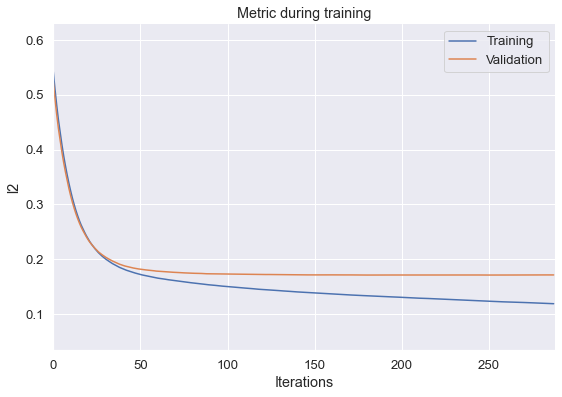

In [116]:
lgb.plot_metric(evals, metric = 'l2')
sns.despine()
plt.show()

In [117]:
history = lgb.cv(params, train_data, num_boost_round = 5000, 
                 nfold = 5, stratified = False, early_stopping_rounds = 100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 872
[LightGBM] [Info] Number of data points in the train set: 11428, number of used features: 18
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 872
[LightGBM] [Info] Number of data points in the train set: 11428, number of used features: 18
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 872
[LightGBM] [Info] Number of data points in the train set: 11428, number of used features: 18
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, th

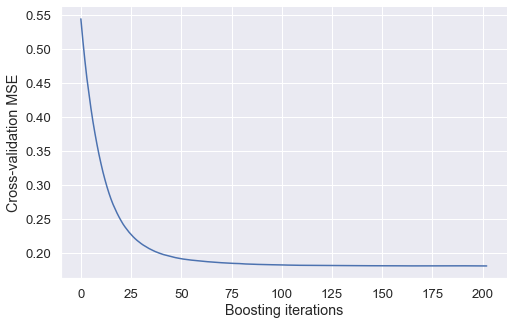

In [118]:
fig, ax = plt.subplots(figsize=(8,5))

plt.plot(history['l2-mean'])

ax.set_ylabel('Cross-validation MSE')
ax.set_xlabel('Boosting iterations')

sns.despine()
plt.show()

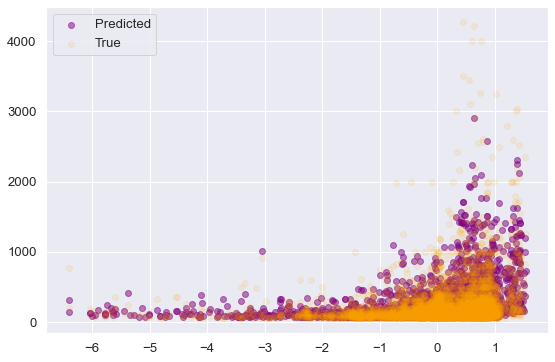

In [119]:
y_pred8 = lgbm.predict(X_valid)
plt.scatter(X_valid.iloc[:, 4], np.exp(y_pred8), color='purple', alpha=0.5, label='Predicted')
plt.scatter(X_valid.iloc[:, 4], np.exp(y_valid), color='orange', alpha=0.1, label='True')

plt.legend()
plt.show()

### Residual diagnostic

In [120]:
resid = np.exp(y_valid) - np.exp(y_pred8)

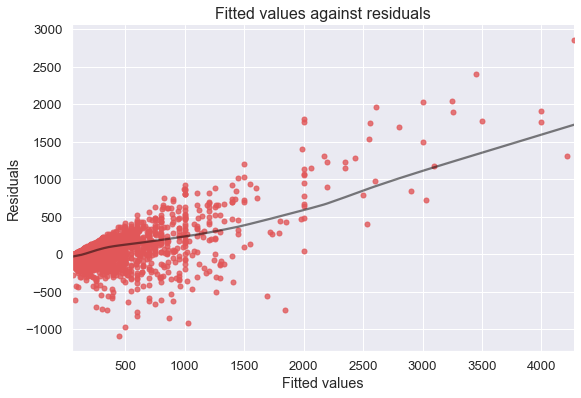

In [121]:
fig, ax = plt.subplots()
sns.regplot(x=np.exp(y_valid), y=resid, ci=None, lowess= True, scatter_kws={'s':25, 'color': colours[2]}, 
            line_kws={'color':'black', 'alpha':0.5})
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Fitted values against residuals', fontsize=16)
sns.despine()
plt.show()

In [122]:
r2_score(np.exp(y_valid), np.exp(y_pred8))

0.659311373521425

## 4.9 Model Stacking

In [123]:
%%time

stack = StackingCVRegressor(regressors=[lr, l1, knn, rf, gb, cb], meta_regressor=LinearRegression(), 
                           cv=5, random_state=77, store_train_meta_features=True)
stack.fit(X_train, y_train)

Wall time: 4min 59s


StackingCVRegressor(meta_regressor=LinearRegression(), random_state=77,
                    regressors=[LinearRegression(), Lasso(alpha=0.2),
                                KNeighborsRegressor(n_neighbors=28),
                                RandomForestRegressor(max_depth=68,
                                                      max_features='log2',
                                                      min_samples_leaf=3,
                                                      random_state=77),
                                GradientBoostingRegressor(learning_rate=0.01,
                                                          max_depth=8,
                                                          n_estimators=2000,
                                                          random_state=77,
                                                          subsample=0.6),
                    store_train_meta_features=True)

In [124]:
stack.meta_regr_.coef_

array([ 0.06850356, -0.02777128,  0.00624083,  0.20182888,  0.32353551,
        0.42242815])

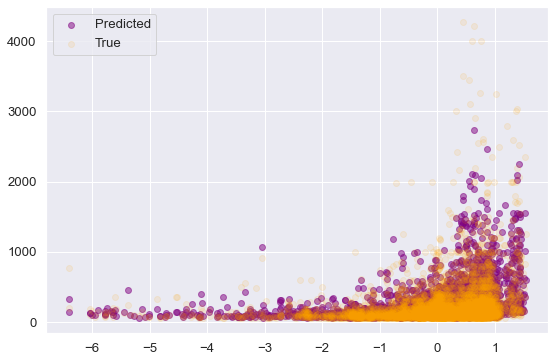

In [125]:
y_pred9 = stack.predict(X_valid)
plt.scatter(X_valid.iloc[:, 4], np.exp(y_pred9), color='purple', alpha=0.5, label='Predicted')
plt.scatter(X_valid.iloc[:, 4], np.exp(y_valid), color='orange', alpha=0.1, label='True')

plt.legend()
plt.show()

### Residual diagnostic

In [126]:
resid = np.exp(y_valid) - np.exp(y_pred9)

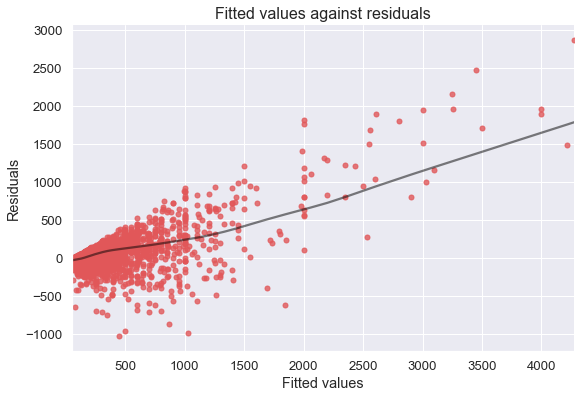

In [127]:
fig, ax = plt.subplots()
sns.regplot(x=np.exp(y_valid), y=resid, ci=None, lowess= True, scatter_kws={'s':25, 'color': colours[2]}, 
            line_kws={'color':'black', 'alpha':0.5})
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Fitted values against residuals', fontsize=16)
sns.despine()
plt.show()

In [128]:
r2_score(np.exp(y_valid), np.exp(y_pred9))

0.6599769674301119

## 4.10 Model Average

In [129]:
y_pred10 = (y_pred1 + y_pred2 + y_pred3 + y_pred4 + y_pred5 + y_pred6 + y_pred7 + y_pred8) / 8

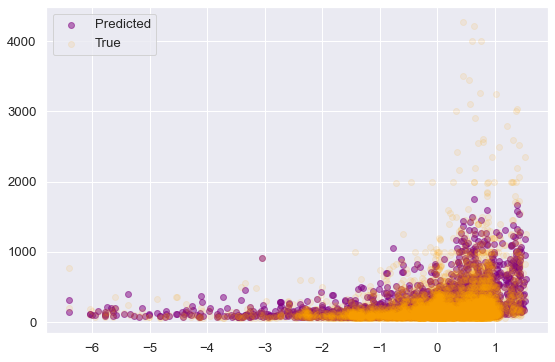

In [130]:
plt.scatter(X_valid.iloc[:, 4], np.exp(y_pred10), color='purple', alpha=0.5, label='Predicted')
plt.scatter(X_valid.iloc[:, 4], np.exp(y_valid), color='orange', alpha=0.1, label='True')

plt.legend()
plt.show()

### Residual diagnostic

In [131]:
resid = np.exp(y_valid) - np.exp(y_pred10)

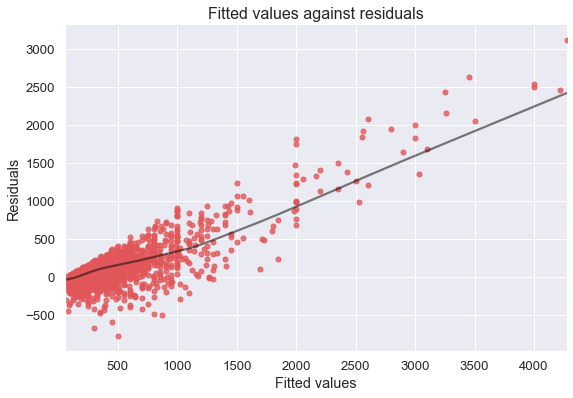

In [132]:
fig, ax = plt.subplots()
sns.regplot(x=np.exp(y_valid), y=resid, ci=None, lowess= True, scatter_kws={'s':25, 'color': colours[2]}, 
            line_kws={'color':'black', 'alpha':0.5})
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Fitted values against residuals', fontsize=16)
sns.despine()
plt.show()

In [133]:
r2_score(np.exp(y_valid), np.exp(y_pred9))

0.6599769674301119

# 5. Model Selection

In [134]:
columns = ['RMSLE', 'RMSE', 'R$^2$']

rows = ['Linear Regression (Benchmark)', 'Lasso',
        'KNN (n=28)', 'Random Forest', 'Generalized Additive Model',
        'Gradient Boosting', 'CatBoost', 'LightGBM',
        'Stack', 'Average']

results = pd.DataFrame(0.0, columns=columns, index=rows)

models = [lr, l1,
          knn, rf, gam,
          gb, cb, lgbm,
          stack, 'average']

y_valid_exp = np.exp(y_valid)

for i, model in enumerate(models):
    if model == 'average':
        y_pred = np.exp(y_pred10)
    else:
        y_pred = np.exp(model.predict(X_valid))
    
    results.iloc[i, 0] = np.sqrt(mean_squared_log_error(y_valid_exp, y_pred))
    results.iloc[i, 1] = np.sqrt(mean_squared_error(y_valid_exp, y_pred))
    results.iloc[i, 2] = r2_score(y_valid_exp, y_pred)

In [135]:
results.round(3)

,RMSLE,RMSE,R$^2$
Linear Regression (Benchmark),0.456,193.605,0.568
Lasso,0.548,257.796,0.233
KNN (n=28),0.443,193.702,0.567
Random Forest,0.418,181.344,0.621
Generalized Additive Model,0.446,188.299,0.591
Gradient Boosting,0.418,174.229,0.650
CatBoost,0.412,170.955,0.663
LightGBM,0.411,171.836,0.659
Stack,0.411,171.668,0.660
Average,0.421,187.821,0.593


# 6. Test set

In [136]:
test = pd.read_csv('Data/test.csv', index_col='id')
test.head(1)

,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
0,Private room & bath close to CBD & Darling Har...,"Modern shared apartment, close to places you w...",Pyrmont is particularly known for its famous F...,Jerome,2017-06-02,"Sydney, New South Wales, Australia",NaN,NaN,NaN,100%,...,10.0,10.0,10.0,10.0,t,1,0,1,0,0.17


In [137]:
df = test[candidates]

# ------------------------------------

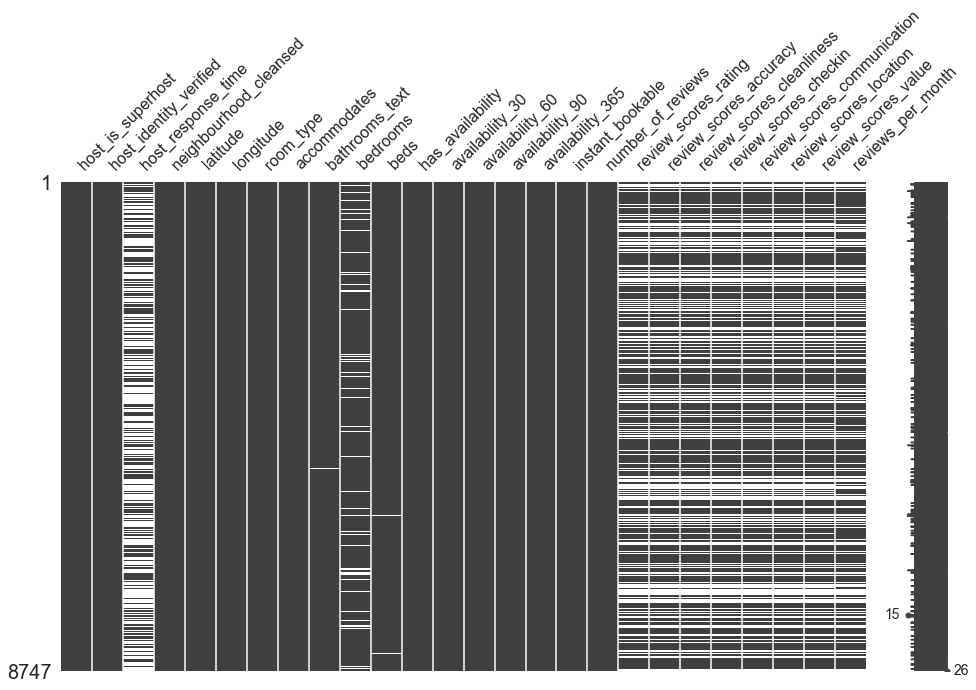

In [138]:
msno.matrix(df, figsize=(16, 9))
plt.show()

In [139]:
df = df.drop(columns=['host_response_time', 'reviews_per_month'], axis=1)

# ------------------------------------

In [140]:
# Merge review scores into one column
df['review_avg'] = df[['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                       'review_scores_communication', 'review_scores_location', 'review_scores_value']].mean(axis=1)

df = df.drop(columns=['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                      'review_scores_communication', 'review_scores_location', 'review_scores_value'], axis=1)

# Use 0 to present no average review score
df['review_avg'] = np.floor(df['review_avg'])
df['review_avg'] = df['review_avg'].fillna(0).astype('int')
df['review_avg'].value_counts()

9     3166
0     2852
10    2160
8      365
7      115
6       40
5       19
2       16
4        8
3        6
Name: review_avg, dtype: int64

# ------------------------------------

In [141]:
# Convert t/f to 1/0
binary = {'t':1, 'f':0}
for i in ['host_is_superhost', 'host_identity_verified', 'instant_bookable', 'has_availability']:
    df.replace({i:binary},inplace=True)

# ------------------------------------

In [142]:
# Convert bathrooms_text to number of bathrooms
print(df['bathrooms_text'].unique())

def clean(x):
    if type(x) == float:
        return x
    elif x in ['18 baths', '18 shared baths']:
        return 18
    elif x == '10 baths':
        return 10
    elif x in ['Private half-bath', 'Half-bath', 'Shared half-bath']:
        return 1 # 0/1 ?
    else:
        return int(x[0])

df['bathrooms'] = df['bathrooms_text'].map(clean)
df = df.drop(columns='bathrooms_text', axis=1)

['1 shared bath' '1 bath' '1.5 baths' '4 baths' '2 baths' '3 baths'
 '2.5 baths' '1.5 shared baths' '1 private bath' '4.5 baths' '3.5 baths'
 'Shared half-bath' '2 shared baths' '0 baths' '3 shared baths' nan
 '5.5 baths' 'Private half-bath' 'Half-bath' '5 baths' '0 shared baths'
 '2.5 shared baths' '6 shared baths' '4 shared baths' '3.5 shared baths'
 '8 shared baths' '6.5 baths' '6 baths' '18 shared baths' '7 baths'
 '18 baths']


In [143]:
df['bathrooms'].isnull().sum()

10

In [144]:
df['bathrooms'].fillna(1, inplace=True)

In [145]:
df['bathrooms'].value_counts()

1.0     6590
2.0     1643
3.0      364
4.0       94
0.0       29
5.0       13
6.0       10
18.0       2
8.0        1
7.0        1
Name: bathrooms, dtype: int64

In [146]:
df.loc[df['bathrooms']==18, 'bathrooms'] = 1

In [147]:
df.loc[df['bathrooms']>6, 'bathrooms'] = 6

# ------------------------------------

In [148]:
for i in ['availability_30', 'availability_60', 'availability_90', 'availability_365']:
    df.loc[df[i] > 0, i] = 1

# ------------------------------------

In [149]:
# Bedrooms & Beds & Accomodates
for i in ['bedrooms', 'beds']:
    df[i] = df[i].fillna(df[i].median())

In [150]:
df.loc[df['beds'] > 7, 'beds'] = 7
df.loc[df['bedrooms'] > 7, 'bedrooms'] = 7

In [151]:
df.loc[df['accommodates'] > 10, 'accommodates'] = 7

# ------------------------------------

In [152]:
df['room_type'].value_counts()
# 0: small, 1: big
r_type = {'Private room':0, 'Entire home/apt':1, 'Shared room':0, 'Hotel room':1}
df['room_type'].replace(r_type, inplace=True)

# ------------------------------------

In [153]:
df['neighbor_cb'] = encoder.transform(df[predictor])

In [154]:
df = df.drop('neighbourhood_cleansed', axis=1)

# ------------------------------------

In [155]:
df = df[['host_is_superhost', 'host_identity_verified',
         'neighbor_cb', 'latitude', 'longitude',
         'room_type', 'accommodates', 'beds', 'bedrooms', 'bathrooms',
         'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
         'instant_bookable',
         'number_of_reviews',
         'review_avg']]

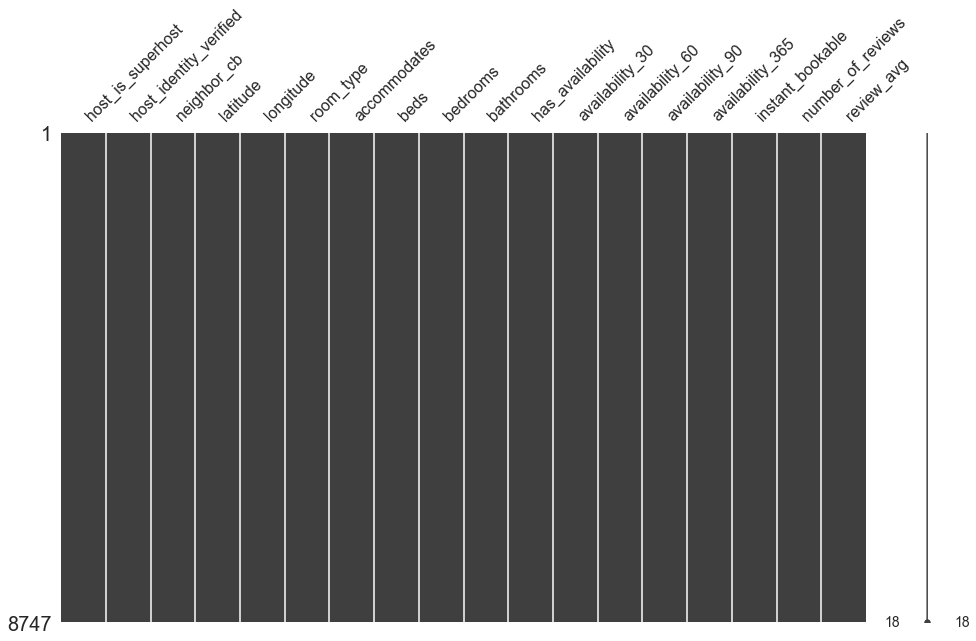

In [156]:
msno.matrix(df, figsize=(16, 9))
plt.show()

In [157]:
df_test = df

# ------------------------------------

In [158]:
df = df_test[['host_is_superhost', 'host_identity_verified',
         'neighbor_cb', 'latitude', 'longitude',
         'room_type', 'accommodates', 'beds', 'bedrooms', 'bathrooms',
         'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
         'instant_bookable',
         'number_of_reviews',
         'review_avg']]

# ------------------------------------

In [159]:
predictors = [x for x in df.columns if x not in exclude]
predictors

['host_is_superhost',
 'host_identity_verified',
 'neighbor_cb',
 'latitude',
 'longitude',
 'room_type',
 'accommodates',
 'beds',
 'bedrooms',
 'bathrooms',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'instant_bookable',
 'number_of_reviews',
 'review_avg']

In [160]:
data = df

In [161]:
# Test set
X_test = scaler.transform(data[predictors])

In [162]:
# Training set
X_train_all = np.vstack((X_train, X_valid))
y_train_all = np.array([list(y_train) + list(y_valid)]).reshape(-1)

# ------------------------------------

## Re-train models with whole training set

In [163]:
# models = [lr, l1,
#           knn, rf, gam,
#           gb, cb, lgbm,
#           stack, 'average']

In [164]:
# %%time

# lr.fit(X_train_all, y_train_all)
# l1.fit(X_train_all, y_train_all)

# knn.fit(X_train_all, y_train_all)
# rf.fit(X_train_all, y_train_all)

# gam.fit(X_train_all, y_train_all)

# gb.fit(X_train_all, y_train_all)
# cb.fit(X_train_all, y_train_all)

In [165]:
# %%time

# train_data = lgb.Dataset(X_train_all, y_train_all)

# lgbm = lgb.train(params, train_data, num_boost_round = 188)

In [166]:
# %%time

# stack.fit(X_train_all, y_train_all)

In [167]:
# %%time

# # Predictions from different models
# test_lr = lr.predict(X_test)
# test_l1 = l1.predict(X_test)

# test_knn = knn.predict(X_test)
# test_rf = rf.predict(X_test)

# test_gam = gam.predict(X_test)

# test_gb = gb.predict(X_test)
# test_cb = cb.predict(X_test)
# test_lgbm = lgbm.predict(X_test)

# test_stack = stack.predict(X_test)

# test_avg = (test_lr + test_l1 +
#             test_knn + test_rf +
#             test_gam +
#             test_gb + test_cb + test_lgbm) / 8

In [168]:
# data['logprice'] = test_lgbm
# data['price'] = np.exp(data['logprice'])

# plt.scatter(range(data.shape[0]), data['price'], alpha=0.2)
# plt.show()

### Output file

In [169]:
# data['price'].to_csv('Final_stack.csv')
# data['price'].to_csv('Final_avg.csv')
# data['price'].to_csv('Final_lgbm.csv')
# data['price'].to_csv('Final_cb.csv')
# data['price'].to_csv('Final_gb.csv')
# data['price'].to_csv('Final_gam.csv')
# data['price'].to_csv('Final_rf.csv')
# data['price'].to_csv('Final_knn.csv')
# data['price'].to_csv('Final_l1.csv')
# data['price'].to_csv('Final_lr.csv')

# ------------------------------------

# 7. Data mining

In [170]:
# Basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
colours = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']

plt.rcParams['figure.figsize'] = (9, 6)
sns.set_palette(colours)

In [171]:
df = pd.read_csv('Data/train.csv')

In [172]:
def clean(x):
    return float(x[1:].replace(',', ''))

df['price'] = df['price'].map(clean)

## 7.1 Geographic

In [173]:
geo = df[['neighbourhood_cleansed', 'latitude', 'longitude', 'price']].sort_values('price', ascending=False).reset_index().round(3)
geo

,index,neighbourhood_cleansed,latitude,longitude,price
0,5249,Woollahra,-33.884,151.264,5000.0
1,8968,The Hills Shire,-33.513,150.905,4429.0
2,5102,Woollahra,-33.888,151.244,4275.0
3,6008,Woollahra,-33.880,151.261,4217.0
4,14788,Pittwater,-33.613,151.330,4000.0
...,...,...,...,...,...
20403,12327,Manly,-33.797,151.283,51.0
20404,19058,Randwick,-33.923,151.230,51.0
20405,8571,Willoughby,-33.797,151.179,51.0
20406,8664,Marrickville,-33.903,151.177,51.0


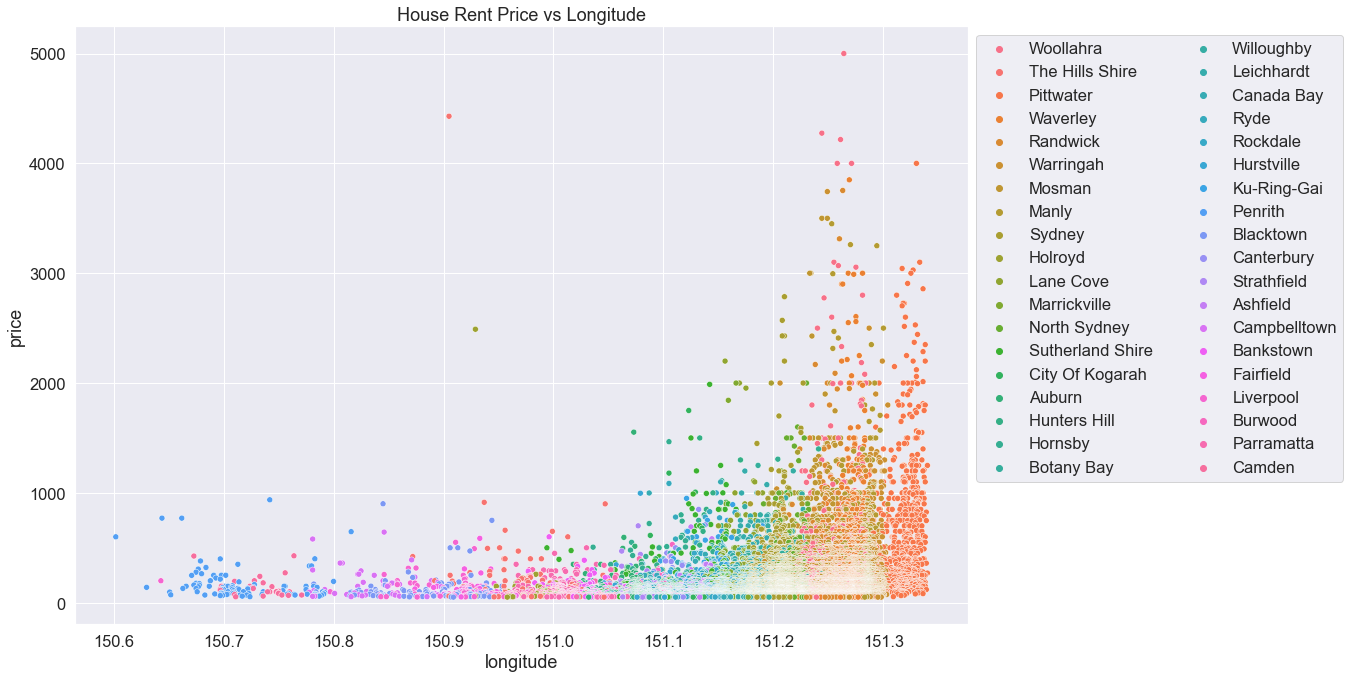

In [174]:
plt.figure(figsize=(16,11))
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)
sns.scatterplot(data=geo, x='longitude', y='price', hue='neighbourhood_cleansed')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', ncol=2)
plt.title('House Rent Price vs Longitude')
plt.show()

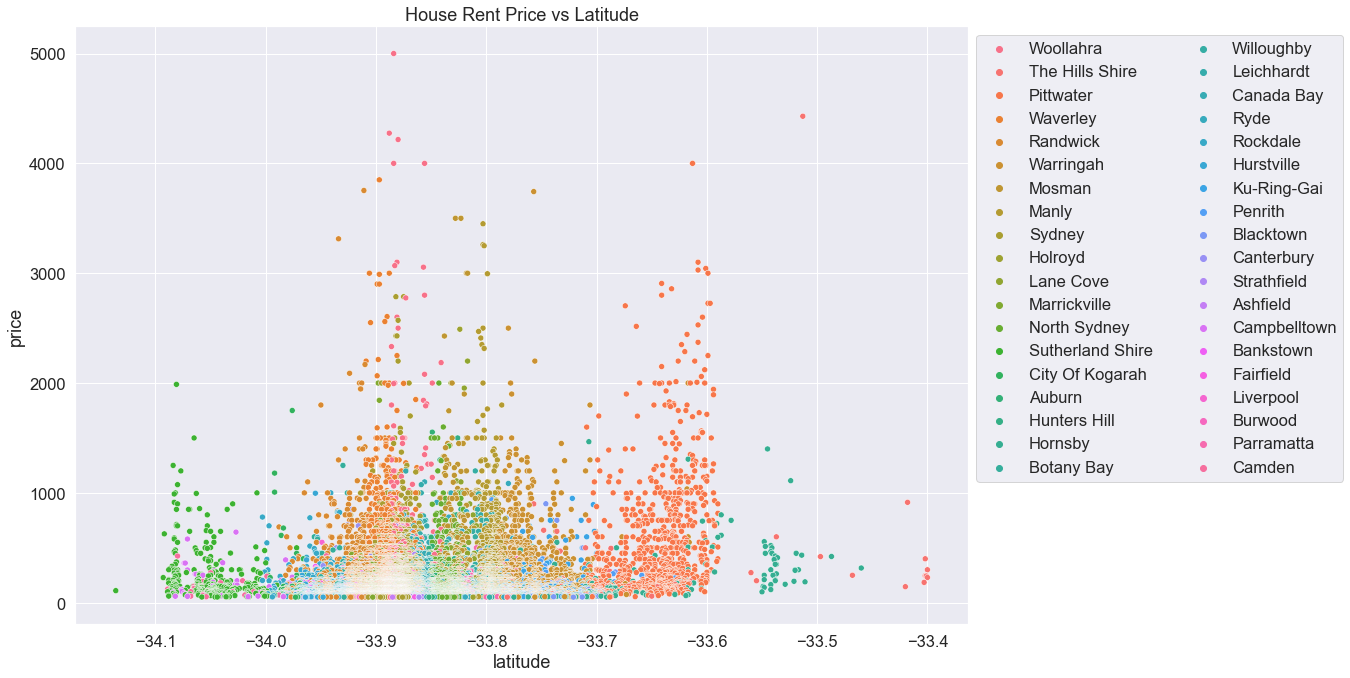

In [175]:
plt.figure(figsize=(16,11))
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)
sns.scatterplot(data=geo, x='latitude', y='price', hue='neighbourhood_cleansed')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', ncol=2)
plt.title('House Rent Price vs Latitude')
plt.show()

# ------------------------------------

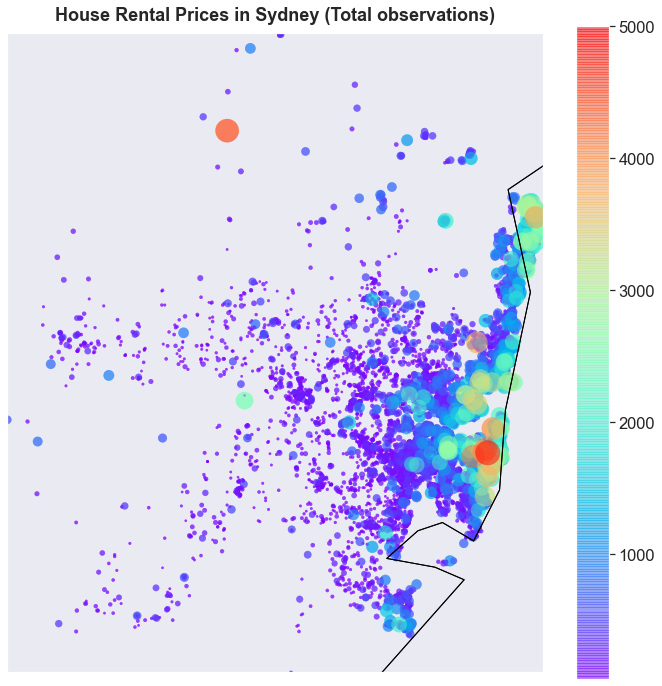

In [176]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

geo = geo.sort_values('price')
lat1, lat2, lon1, lon2 = min(geo.latitude), max(geo.latitude), min(geo.longitude), max(geo.longitude)

# Create figures
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection = ccrs.Mercator())

# Get latitude and longitude for each data point
x, y = (geo['longitude'].to_numpy(), geo['latitude'].to_numpy())

# Scatter plot as heat map
ax.scatter(x, y, s=(geo['price'].to_numpy()/8), c=geo['price'].to_numpy(), 
           edgecolors='none', cmap=plt.get_cmap('rainbow'), alpha=0.5, transform=ccrs.PlateCarree())

plt.colorbar(ax.scatter(x, y, s=(geo['price'].to_numpy()/8), c=geo['price'].to_numpy(), 
           edgecolors='none', cmap=plt.get_cmap('rainbow'), alpha=0.5, transform=ccrs.PlateCarree()))

# Add state borders and coast line
ax.add_feature(cfeature.STATES.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())

# Add title
ax.set_title('House Rental Prices in Sydney (Total observations)', fontsize=18, y=1.01, fontweight='bold')

plt.show()

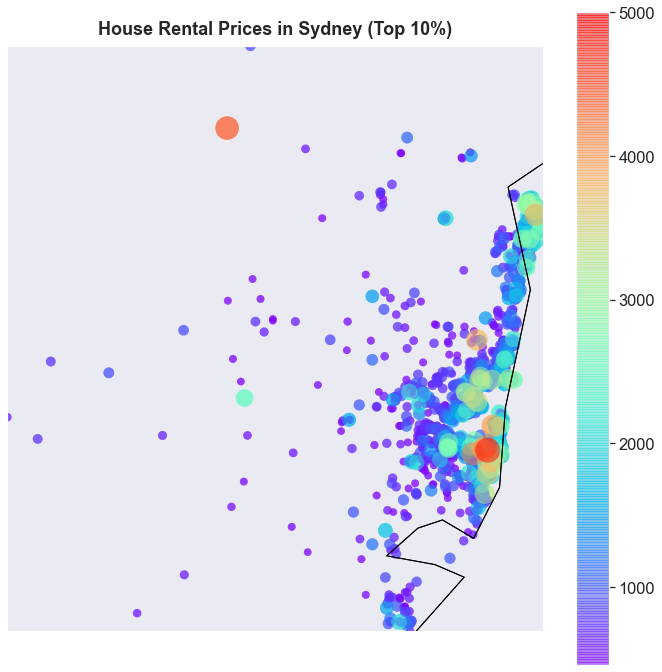

In [177]:
# Selecting the top 10% based on price [:(20408 // 10)]

import cartopy.crs as ccrs
import cartopy.feature as cfeature

geo = geo.sort_values('price', ascending=False)[:(20408 // 10)].sort_values('price')
lat1, lat2, lon1, lon2 = min(geo.latitude), max(geo.latitude), min(geo.longitude), max(geo.longitude)

# Create figures
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection = ccrs.Mercator())

# Get latitude and longitude for each data point
x, y = (geo['longitude'].to_numpy(), geo['latitude'].to_numpy())

# Scatter plot as heat map
ax.scatter(x, y, s=(geo['price'].to_numpy()/8), c=geo['price'].to_numpy(), 
           edgecolors='none', cmap=plt.get_cmap('rainbow'), alpha=0.5, transform=ccrs.PlateCarree())

plt.colorbar(ax.scatter(x, y, s=(geo['price'].to_numpy()/8), c=geo['price'].to_numpy(), 
           edgecolors='none', cmap=plt.get_cmap('rainbow'), alpha=0.5, transform=ccrs.PlateCarree()))

# Add state borders and coast line
ax.add_feature(cfeature.STATES.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())

# Add title
ax.set_title('House Rental Prices in Sydney (Top 10%)', fontsize=18, y=1.01, fontweight='bold')

plt.show()

# ------------------------------------

## 7.2 Room type

In [178]:
room = df[['room_type', 'price']].sort_values('price', ascending=False)
room

,room_type,price
5249,Entire home/apt,5000.0
8968,Entire home/apt,4429.0
5102,Entire home/apt,4275.0
6008,Entire home/apt,4217.0
14788,Entire home/apt,4000.0
...,...,...
12327,Private room,51.0
19058,Private room,51.0
8571,Entire home/apt,51.0
8664,Private room,51.0


In [179]:
room['room_type'].value_counts()

Entire home/apt    14066
Private room        6076
Hotel room           150
Shared room          116
Name: room_type, dtype: int64

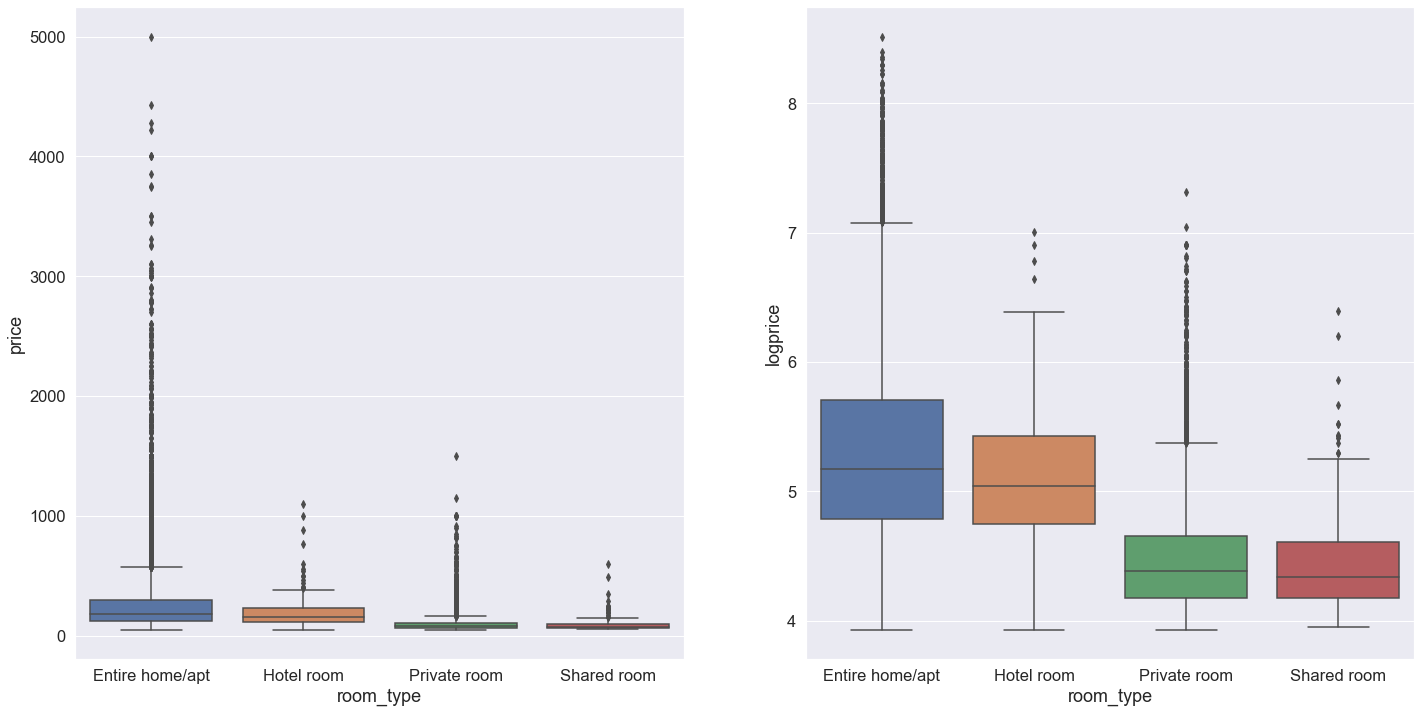

In [180]:
room = room.sort_values('room_type')

fig, axes = plt.subplots(1, 2, figsize=(24,12))
sns.set_style('darkgrid')
sns.set(font_scale = 1.4)

sns.boxplot(data=room, x='room_type', y='price', ax=axes[0])

sns.boxplot(data=room, x='room_type', y=np.log(room['price']), ax=axes[1])
plt.ylabel('logprice')

plt.show()

In [181]:
room = room.sort_values('price', ascending=False)
names = list(room['room_type'].unique())
size_of_groups = room['room_type'].value_counts().to_list()

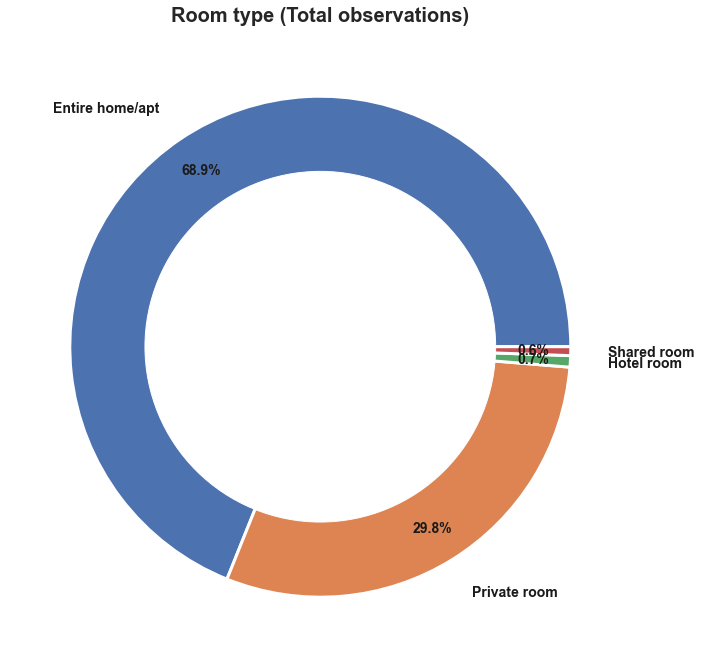

In [182]:
plt.figure(figsize=(10,10))
plt.pie(size_of_groups, labels=names, labeldistance=1.15, wedgeprops={'linewidth':3, 'edgecolor':'white'}, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 14, 'color':'k', 'weight':'bold'})

my_circle = plt.Circle((0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Room type (Total observations)', fontsize=20, y=1.01, fontweight='bold')
plt.tight_layout()
plt.show()

In [183]:
room = room[:(20408 // 10)]
room.loc[room['room_type']!='Entire home/apt', 'room_type'] = 'Others'

In [184]:
names = list(room['room_type'].unique())
size_of_groups = room['room_type'].value_counts().to_list()

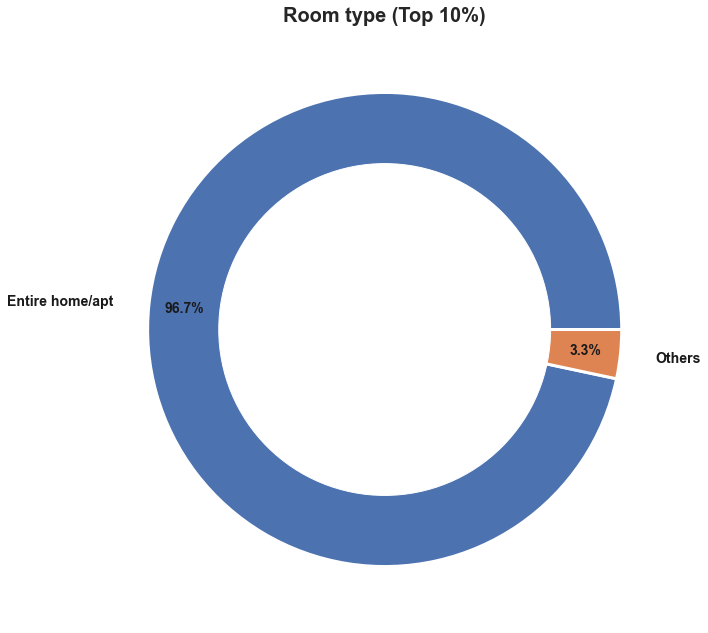

In [185]:
plt.figure(figsize=(10,10))
plt.pie(size_of_groups, labels=names, labeldistance=1.15, wedgeprops={'linewidth':3, 'edgecolor':'white'}, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 14, 'color':'k', 'weight':'bold'})

my_circle = plt.Circle((0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Room type (Top 10%)', fontsize=20, y=1.01, fontweight='bold')
plt.tight_layout()
plt.show()

# ------------------------------------

## 7.3 Popularity

In [186]:
popu = df[['number_of_reviews', 'first_review', 'last_review', 'price']]
popu = popu.dropna()
# popu = popu.sort_values(['price', 'number_of_reviews'], ascending=[False, False])

In [187]:
mid = popu['number_of_reviews'].median()
# popu = popu[popu['number_of_reviews']>mid]
popu = popu.sort_values('price', ascending=False)
popu

,number_of_reviews,first_review,last_review,price
5249,2,2020-01-04,2020-02-06,5000.0
2657,3,2014-11-09,2017-03-19,3743.0
7260,9,2015-01-31,2018-09-30,3000.0
18295,90,2017-04-16,2021-01-23,3000.0
19398,2,2018-11-26,2021-01-16,2990.0
...,...,...,...,...
13451,1,2015-12-30,2015-12-30,51.0
8205,5,2017-02-26,2017-12-15,51.0
9752,64,2016-10-25,2019-10-20,51.0
4317,30,2014-04-20,2019-05-16,51.0


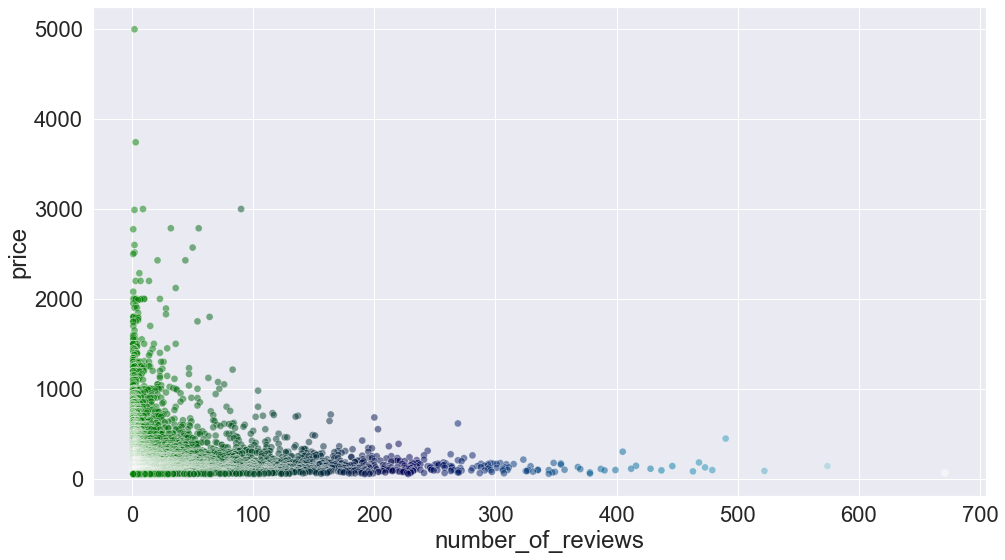

In [188]:
plt.figure(figsize=(16,9))

sns.set_style("darkgrid")
sns.set(font_scale = 2)
sns.scatterplot(data=popu, x='number_of_reviews', y='price', cmap='ocean', c=popu['number_of_reviews'].to_numpy(), alpha=0.5, s=50)

plt.show()

In [189]:
# df[(df['number_of_reviews']>600)]

print(f"Observation No. {df[(df['number_of_reviews']>600)][i].index[0]} \n")

for i in ['name', 'description', 'neighborhood_overview', 'host_since', 'host_about', 'room_type', 'accommodates', 'number_of_reviews', 'price']:
    print(i.title())
    print('= = = = = = = =')
    
    temp = df[(df['number_of_reviews']>600)][i].values[0]
    
    if type(temp) == str:
        print(temp.replace('<br />', ' ').replace('<b>', ' ').replace('</b>', ' '))
    else:
        print(temp)
        
    print('\n')

Observation No. 14940 

Name
= = = = = = = =
Close to Airport and CBD with Secure Parking


Description
= = = = = = = =
My home  is spacious, which is 1 or 2 stops on the train from the airport, depending which Airport Terminal you arrive at and 5-7 minutes walk from the train station,  the train will also take you direct to the City and the Harbour. Undercover parking available at no additional cost, for the time you are here.    I can only accomodate 3 people regardless of the age.   Also, please note my price quoted is for an individual guest, there is an additional charge if others join you.   The space  This is my home and you will be sharing with Michael and me.    The lounge area will give you a widespread view of the City.   Guest access  You have access to everything except for my bedroom and bathroom.   Other things to note  1.      If you wish you can use my washer and dryer (soap powder included) for A$5 per load (this helps cover my soap & electricity costs).   If you wish

In [190]:
# df[(df['number_of_reviews']>70) & (df['price']>2000)]

print(f"Observation No. {df[(df['number_of_reviews']>70) & (df['price']>2000)][i].index[0]} \n")

for i in ['name', 'description', 'neighborhood_overview', 'host_since', 'host_about', 'room_type', 'accommodates', 'number_of_reviews', 'price']:
    print(i.title())
    print('= = = = = = = =')
    temp = df[(df['number_of_reviews']>70) & (df['price']>2000)][i].values[0]
    if type(temp) == str:
        print(temp.replace('<br />', ' ').replace('<b>', ' ').replace('</b>', ' '))
    else:
        print(temp)
    print('\n')

Observation No. 18295 

Name
= = = = = = = =
Carabella Luxury Beach House, Palm Beach Australia


Description
= = = = = = = =
Located in the heart of Palmy with spectacular views of the beach and the iconic Barrenjoey lighthouse and a short walk to the beach. The stunning beach house is perfect to experience a very special part of Sydney.   STRICTLY NO PARTIES or FUNCTIONS  Netflix FOX SPORT HD  Weekly Discount 30%        Monthly Discount 50%  Long weekends minimum 3 nights  Stays over 9 days receive complimentary mid stay clean.   Well behaved pets by request only.   The space  Carabella is a family owned and operated Airbnb property. It is the only property we manage so we give it and our guests 100% attention. We are always working hard to make Carabella the perfect beach house for our guests to enjoy.  CARABELLA was designed to take advantage of the incredible location and the wide aspect view of the ocean and the Barrenjoey headland. The house has the style of a classic beach hous